In [1]:
#imports OpenCV for computer vision tools
import cv2
#imports tools for Label Encoding
from sklearn import preprocessing
#imports OS - Miscellaneous operating system interfaces such as open
import os
#imports PILLOW - Python imaging library
import PIL
from PIL import Image
#imports NumPy
import numpy as np
from numpy import asarray
#imports Mantplotlib
import matplotlib.pyplot as plt
#imports Random
import random
from csv import reader
from sklearn.datasets import load_files   
from glob import glob
#imports Tensorflow and Keras Library
import keras as keras
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import datasets, layers, models
from keras.models import load_model
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.utils import np_utils

In [2]:
DS_1 = (r"C:/Users/btheb/OneDrive/Desktop/kaggle-one-shot-pokemon/pokemon-a")
DS_2 = (r"C:/Users/btheb/OneDrive/Desktop/kaggle-one-shot-pokemon/pokemon-b")


In [3]:
Type_dict ={}
with open (r'C:/Users/btheb/OneDrive/Desktop/pokemon.csv') as read_obj:
        csv_reader = reader(read_obj)
        header = next(csv_reader)
        for row in csv_reader:
            tempdict = {row[3]:row[1]}
            Type_dict.update(tempdict)

In [4]:
size = (32,32)

In [5]:
TypeList = ('Bug', 'Dark','Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire' ,'Flying',
 'Ghost' ,'Grass', 'Ground' ,'Ice', 'Normal','Normal2', 'Poison', 'Psychic', 'Rock', 'Steel',
 'Water','Water2')

In [6]:
Pokemon = []
Type =[]
Index_Number =[]

In [7]:
for file in os.listdir(DS_1):
    Hold =(file.split('.')[0])
    Index_Number.append(float(Hold.split('-')[0]))
    Type_holder =(Type_dict.get(Hold.split('-')[0]))
    Type.append(Type_holder)
    #print(float(Hold.split('-')[0]))
    #print(Type_holder)
    image = cv2.imread(DS_1+"/"+file)
    image = cv2.resize(image, size)
    image_array = np.asarray(image)
    Pokemon.append([image_array,(TypeList.index(str(Type_holder)))])
    Index_Number.append(float(Hold.split('-')[0]))
    Type.append(Type_holder)
    image_array=np.flip(image_array)
    Pokemon.append([image_array,(TypeList.index(str(Type_holder)))])
    Index_Number.append(float(Hold.split('-')[0]))
    Type.append(Type_holder)
    image_array=np.rot90(image_array)
    Pokemon.append([image_array,(TypeList.index(str(Type_holder)))])
    Index_Number.append(float(Hold.split('-')[0]))
print('Done 1')

for file in os.listdir(DS_2):
    Hold =(file.split('.')[0])
    Index_Number.append(float(Hold.split('-')[0]))
    Type_holder =(Type_dict.get(Hold.split('-')[0]))
    Type.append(Type_holder)
    image = cv2.imread(DS_2+"/"+file)
    image = cv2.resize(image, size)
    image_array = np.asarray(image)
    Pokemon.append([image_array,(TypeList.index(str(Type_holder)))])
    Index_Number.append(float(Hold.split('-')[0]))
    Type.append(Type_holder)
    image_array=np.flip(image_array)
    Pokemon.append([image_array,(TypeList.index(str(Type_holder)))])
    image_array=np.rot90(image_array)
    Pokemon.append([image_array,(TypeList.index(str(Type_holder)))])
    Index_Number.append(float(Hold.split('-')[0]))
print('Done 2')

Done 1
Done 2


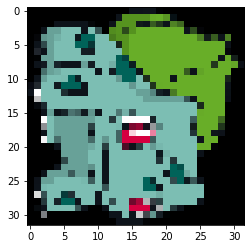

In [8]:
#shows an examlple of the image
plt.imshow(Pokemon[2][0])

In [9]:
#sets the random seed to split the images into training and testing 
random.seed(42)
#shuffles the images and numbers
np.random.shuffle(Pokemon)
np.random.shuffle(Index_Number)
#finds the first 80 perccent of the images and puts them into training
Top = len(Pokemon)
P=int(Top*.80)

Training = Pokemon[0:P]
Test = Pokemon[P:Top]

In [10]:
#turns training and testing into marixs with values that are floats
x_train = []
y_train =[]

x_test =[]
y_test =[]

for feature, label in Training:
  x_train.append(feature)
  y_train.append(label)
    
x_train = np.array(x_train).astype(np.float32)
y_train = np.array(y_train)

for feature, label in Test:
  x_test.append(feature)
  y_test.append(label)
    


x_test = np.array(x_test).astype(np.float32)
y_test = np.array(y_test)

In [48]:

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32, 3)),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(20, activation='relu')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [49]:
Model = model.fit(x_train,y_train,batch_size=200,epochs =10,validation_data=(x_test,y_test))

Epoch 1/10
22/22 [==============================] - 5s 192ms/step - loss: 2.9601 - accuracy: 0.0754 - val_loss: 2.8968 - val_accuracy: 0.0986
Epoch 2/10
22/22 [==============================] - 4s 184ms/step - loss: 2.9230 - accuracy: 0.1004 - val_loss: 2.8617 - val_accuracy: 0.0986
Epoch 3/10
22/22 [==============================] - 4s 190ms/step - loss: 2.9039 - accuracy: 0.0981 - val_loss: 2.8383 - val_accuracy: 0.1128
Epoch 4/10
22/22 [==============================] - 4s 188ms/step - loss: 2.8656 - accuracy: 0.1192 - val_loss: 2.7974 - val_accuracy: 0.1621
Epoch 5/10
22/22 [==============================] - 4s 189ms/step - loss: 2.8107 - accuracy: 0.1379 - val_loss: 2.7495 - val_accuracy: 0.1782
Epoch 6/10
22/22 [==============================] - 4s 193ms/step - loss: 2.7986 - accuracy: 0.1578 - val_loss: 2.7407 - val_accuracy: 0.1981
Epoch 7/10
22/22 [==============================] - 4s 193ms/step - loss: 2.7620 - accuracy: 0.1757 - val_loss: 2.6911 - val_accuracy: 0.2076
Epoch 

In [50]:
score = model.evaluate(x_test,y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 2.695082902908325
Test accuracy: 0.18578198552131653


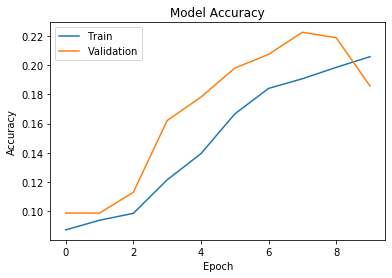

In [51]:
def plot_hist(Model):
    plt.plot(Model.history["accuracy"])
    plt.plot(Model.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()
    
plot_hist(Model)

In [52]:
#Defines Image Location
Image_location =(r"C:/Users/btheb/OneDrive/Desktop/kaggle-one-shot-pokemon/pokemon-tcg-images")

In [53]:
#Creates loop to load in images
#defines holding lists
TCG_Pokemon =[]
ActualType = []
#loop to open images and save them in
#images are ssaved with a number after a . to indicate type
for file in os.listdir(Image_location):
    image = cv2.imread(Image_location+"/"+file)
    image = cv2.resize(image, (32,32))
    image_array = np.asarray(image)
    TCG_Pokemon.append([image_array])
    LookupValue =(int(file.split('-')[0]))
    holding=(Type_dict.get(str(LookupValue)))
    ActualType.append(TypeList.index(str(holding)))
#Defines a loop to make the images a matrix
TCG_Test = []

for file in TCG_Pokemon:
    TCG_Test.append(file)

TCG_Test =np.array(TCG_Test).astype(np.float32)



In [54]:
#Testing model with just the first data set
Count = 0
Correct = 0
Incorrect = 0
#loop for predicting 
for TCG in TCG_Test :
    #uses the model to make a prediction 
    Type_predict = model.predict(TCG)
    print(Type_predict)
    #finds the the type in the type list
    Type_info = np.where(Type_predict==np.amax(Type_predict))
    Type=Type_info[1]
    Type = int(Type)
    #finds the actual type
    Acc = ActualType[Count]
    #prints results
    print(str(Count +1)+"  Prediction : " + TypeList[Type]+ "     Actual: "+ TypeList[Acc]  )
    Count = Count +1
    #creates an if statment to record accuracy 
    if TypeList[Type] == TypeList[Acc]:
        Correct = Correct + 1
    if TypeList[Type] != TypeList[Acc]:
        Incorrect = Incorrect + 1
total = Correct + Incorrect
print('Model Stats:')
print('Total Correct : ' + str(Correct))
print('Total Incorrect :' + str(Incorrect))
print('Accuracy : ' + str(Correct/total))


[[3.0521777  0.         0.         1.6356302  0.         0.
  0.         0.         0.         4.1696978  0.71180737 0.
  0.4293845  0.46618053 0.         1.7355504  0.99750584 0.
  2.2326963  2.1863053 ]]
1  Prediction : Grass     Actual: Grass
[[2.2041228  0.         0.         1.4771745  0.         0.
  0.         0.         0.         2.4576647  0.9572579  0.
  0.         0.39942977 0.         1.0485266  0.6426498  0.
  1.6488292  1.2740731 ]]
2  Prediction : Grass     Actual: Grass
[[3.7595057  0.         0.         1.9451634  0.         0.
  0.         0.         0.         4.988245   0.72615695 0.
  0.3320366  0.3835198  0.         2.1361866  1.267631   0.
  2.6771836  2.759323  ]]
3  Prediction : Grass     Actual: Grass
[[4.3107114  0.         0.         2.2110045  0.         0.
  0.         0.         0.         5.8793435  0.8989732  0.
  0.44443154 0.6765406  0.         2.516585   1.3241215  0.
  3.081448   3.1771755 ]]
4  Prediction : Grass     Actual: Grass
[[3.4031162  0. 

[[1.8391598  0.         0.         0.87727934 0.         0.
  0.         0.         0.         2.4640112  0.34005037 0.
  0.23306607 0.19514175 0.         1.0480645  0.6382787  0.
  1.3120013  1.3512812 ]]
41  Prediction : Grass     Actual: Grass
[[4.771448   0.         0.         2.4280627  0.         0.
  0.         0.         0.         6.5252576  1.0171187  0.
  0.53612113 0.7774188  0.         2.7293754  1.435771   0.
  3.4109168  3.5452077 ]]
42  Prediction : Grass     Actual: Grass
[[2.6053102  0.         0.         1.3306834  0.         0.
  0.         0.         0.         3.4422243  0.5631377  0.
  0.2099313  0.33038023 0.         1.4730117  0.83185863 0.
  1.9003379  1.8554138 ]]
43  Prediction : Grass     Actual: Grass
[[3.4974525  0.         0.         1.87549    0.         0.
  0.         0.         0.         4.626998   0.76561046 0.
  0.04199046 0.5249828  0.         2.1747894  0.9519027  0.
  2.6433725  2.3372917 ]]
44  Prediction : Grass     Actual: Grass
[[5.335195  

[[0.4440785  0.         0.         0.06647454 0.         0.
  0.         0.         0.         0.26398185 0.         0.
  0.5643701  0.12117214 0.         0.0982113  0.25035608 0.
  0.1991786  0.38411957]]
81  Prediction : Normal     Actual: Poison
[[3.527885   0.80087936 0.         1.3727064  0.         0.
  5.647937   0.         0.         0.         1.491034   0.
  1.867372   1.7716669  0.         2.1435215  0.9893142  0.
  2.8217578  1.502389  ]]
82  Prediction : Fire     Actual: Ground
[[3.0714412  0.67037493 0.         1.2148674  0.         0.
  4.8397627  0.         0.         0.         1.2772578  0.
  1.6286986  1.498885   0.         1.8154088  0.89684737 0.
  2.4117992  1.3023739 ]]
83  Prediction : Fire     Actual: Ground
[[0.9424526  0.         0.         0.40641192 0.         0.
  0.         0.         0.         1.2634084  0.22578311 0.
  0.1023359  0.03923494 0.         0.49669522 0.4144098  0.
  0.75249815 0.62040424]]
84  Prediction : Grass     Actual: Ground
[[1.05967

[[1.575481   0.         0.         1.6528276  0.         0.
  0.2952276  0.         0.         1.0986285  0.82690173 0.
  0.         0.3394875  0.         1.02618    0.4927695  0.
  1.297679   0.52597743]]
122  Prediction : Electric     Actual: Water
[[1.7330085  0.         0.         1.4654106  0.         0.
  0.30565152 0.         0.         1.1530782  0.83517027 0.
  0.         0.4653873  0.         0.83395195 0.5880055  0.
  1.2277768  0.7498478 ]]
123  Prediction : Bug     Actual: Water
[[1.3639071  0.         0.         1.2616571  0.         0.
  0.         0.         0.         1.1870087  0.5904805  0.
  0.03987761 0.26145062 0.         0.8165845  0.41064563 0.
  1.0341758  0.63148034]]
124  Prediction : Bug     Actual: Water
[[0.73066294 0.08622112 0.         0.45142487 0.         0.
  0.77407545 0.         0.         0.         0.4131693  0.
  0.11027531 0.50574005 0.         0.47095528 0.33812517 0.
  0.6810339  0.5688896 ]]
125  Prediction : Fire     Actual: Water
[[3.892449

[[1.5349542  0.         0.         1.036263   0.         0.
  0.         0.         0.         1.7344526  0.37991157 0.
  0.07118066 0.22313784 0.         0.8922499  0.47428042 0.
  1.0430975  1.0013652 ]]
156  Prediction : Grass     Actual: Water2
[[0.6439701  0.08649604 0.         0.46566293 0.         0.
  0.77546275 0.         0.         0.         0.4168955  0.
  0.06902693 0.32773188 0.         0.35761398 0.32350823 0.
  0.5837677  0.3678138 ]]
157  Prediction : Fire     Actual: Water2
[[1.6956339  0.         0.         0.9691152  0.         0.
  0.         0.         0.         2.264715   0.47326306 0.
  0.25010374 0.28928033 0.         0.9439692  0.60013294 0.
  1.2781413  1.1392217 ]]
158  Prediction : Grass     Actual: Psychic
[[0.721066   0.0489221  0.         0.40500578 0.         0.
  0.7860522  0.         0.         0.         0.34708333 0.
  0.34922618 0.42661276 0.         0.28310648 0.31870806 0.
  0.53728306 0.5934073 ]]
159  Prediction : Fire     Actual: Psychic
[[1.

  1.5381277  1.5023515 ]]
196  Prediction : Grass     Actual: Bug
[[2.1987398 0.6571094 0.        1.1736416 0.        0.        3.473419
  0.        0.        0.        1.2368473 0.        0.5439852 1.0572227
  0.        1.4399945 0.8691978 0.        2.0801218 0.6385994]]
197  Prediction : Fire     Actual: Normal
[[1.3100774  0.25313962 0.         0.54396147 0.         0.
  2.0370984  0.         0.         0.         0.67386365 0.
  0.42100248 0.61475873 0.         0.7402937  0.44104442 0.
  1.0712098  0.59459394]]
198  Prediction : Fire     Actual: Normal
[[0.6774635  0.2044572  0.         0.23984952 0.         0.
  1.1498526  0.         0.         0.         0.3481778  0.
  0.3026224  0.58234394 0.         0.5244011  0.23709208 0.
  0.70801556 0.5534697 ]]
199  Prediction : Fire     Actual: Normal
[[0.6880452  0.         0.         0.4929025  0.         0.
  0.08170687 0.         0.         0.52533644 0.28136075 0.
  0.         0.28806046 0.         0.65476274 0.18880568 0.
  0.66592

[[1.4522356 0.4718661 0.        0.5722457 0.        0.        2.5087135
  0.        0.        0.        0.5762685 0.        0.9409256 1.1282282
  0.        1.087956  0.5566238 0.        1.4776139 0.996453 ]]
236  Prediction : Fire     Actual: Water2
[[1.5081805  0.28635743 0.         0.6035543  0.         0.
  2.421601   0.         0.         0.         0.7067487  0.
  0.6908432  0.856669   0.         0.8917721  0.49851114 0.
  1.2970009  0.86536515]]
237  Prediction : Fire     Actual: Water2
[[0.7353632  0.1767059  0.         0.3016961  0.         0.
  1.0238204  0.         0.         0.         0.28247842 0.
  0.41052327 0.53937674 0.         0.46697536 0.31578222 0.
  0.61757255 0.5542972 ]]
238  Prediction : Fire     Actual: Water2
[[0.9460028  0.35213977 0.         0.3718434  0.         0.
  1.7667813  0.         0.         0.         0.45604882 0.
  0.5473376  1.1524335  0.         0.87193227 0.36409998 0.
  1.1943636  1.1087962 ]]
239  Prediction : Fire     Actual: Water2
[[1.09

[[3.7865956  0.         0.         2.016053   0.         0.
  0.         0.         0.         4.933859   0.7828666  0.
  0.300696   0.45311022 0.         2.130305   1.2072244  0.
  2.6854873  2.7491703 ]]
276  Prediction : Grass     Actual: Electric
[[0.85105526 0.         0.         0.42879382 0.         0.
  0.         0.         0.         0.98701656 0.19910534 0.
  0.05186319 0.06805827 0.         0.44843546 0.31538284 0.
  0.6102627  0.56070673]]
277  Prediction : Grass     Actual: Electric
[[1.6700344  0.         0.         0.880011   0.         0.
  0.         0.         0.         2.1078413  0.33229604 0.
  0.14452    0.152129   0.         0.9415338  0.588367   0.
  1.1864424  1.1782885 ]]
278  Prediction : Grass     Actual: Electric
[[2.1858199  0.         0.         1.054395   0.         0.
  0.         0.         0.         3.0979855  0.47671363 0.
  0.3323959  0.26605594 0.         1.2441826  0.7992813  0.
  1.6634151  1.5725583 ]]
279  Prediction : Grass     Actual: Elect

  0.6006923  0.45410863]]
315  Prediction : Grass     Actual: Normal
[[1.0864872  0.         0.         0.47468558 0.         0.
  0.         0.         0.         1.5365664  0.26621208 0.
  0.17388768 0.14260072 0.         0.60617745 0.4025399  0.
  0.87602717 0.72734797]]
316  Prediction : Grass     Actual: Normal
[[0.5441896  0.18655604 0.         0.21792589 0.         0.
  0.7192161  0.         0.         0.         0.14546022 0.
  0.37102938 0.43995678 0.         0.4391066  0.2705166  0.
  0.4815241  0.3834142 ]]
317  Prediction : Fire     Actual: Normal
[[2.6161268  0.         0.         1.3250628  0.         0.
  0.         0.         0.         3.636267   0.28627232 0.
  0.32835463 0.24918473 0.         1.7327924  0.954329   0.
  1.7923944  1.9944334 ]]
318  Prediction : Grass     Actual: Normal
[[1.6541815  0.         0.         0.9034519  0.         0.
  0.         0.         0.         2.2266445  0.28512302 0.
  0.22308786 0.25486514 0.         1.0409427  0.513293   0.
  1.2

[[1.3848454  0.19674987 0.         0.71585244 0.         0.
  1.8362764  0.         0.         0.         0.55244714 0.
  0.66654164 0.6794573  0.         0.62802076 0.65808785 0.
  1.0701342  0.7691354 ]]
354  Prediction : Fire     Actual: Psychic
[[0.23313214 0.00329529 0.         0.05392374 0.         0.
  0.09662244 0.         0.         0.07079845 0.00445    0.
  0.1339541  0.41962364 0.         0.569271   0.11933543 0.
  0.3125695  0.37619066]]
355  Prediction : Psychic     Actual: Psychic
[[0.9651912  0.         0.         0.45095977 0.         0.
  0.         0.         0.         1.2720169  0.19404337 0.
  0.1721892  0.11565807 0.         0.52822554 0.37768534 0.
  0.6937776  0.700555  ]]
356  Prediction : Grass     Actual: Psychic
[[0.3050108  0.         0.         0.21027201 0.         0.
  0.06825273 0.         0.         0.18263271 0.10241758 0.
  0.         0.3347445  0.         0.6729315  0.04500566 0.
  0.35531753 0.3446915 ]]
357  Prediction : Psychic     Actual: Psych

[[1.9299245  0.         0.         1.1293087  0.         0.
  0.         0.         0.         2.3883674  0.46492723 0.
  0.1641316  0.26878157 0.         1.0793381  0.61129725 0.
  1.3737743  1.3110679 ]]
387  Prediction : Grass     Actual: Psychic
[[0.6963304  0.         0.         0.3070064  0.         0.
  0.         0.         0.         0.9645637  0.00218408 0.
  0.46507093 0.05400085 0.         0.34002408 0.43810722 0.
  0.44903058 0.5686836 ]]
388  Prediction : Grass     Actual: Psychic
[[2.2926438  0.         0.         1.1193067  0.         0.
  0.         0.         0.         3.487979   0.45659816 0.
  0.37694174 0.6956092  0.         1.6227211  0.5595109  0.
  1.665355   1.7043813 ]]
389  Prediction : Grass     Actual: Psychic
[[3.9411647  0.         0.         1.9949744  0.         0.
  0.         0.         0.         5.7098837  0.88981074 0.
  0.67391646 0.5975377  0.         2.2515311  1.3550855  0.
  2.9878185  2.8840435 ]]
390  Prediction : Grass     Actual: Grass
[[

[[0.47827232 0.0618458  0.         0.4598859  0.         0.
  0.3863723  0.         0.         0.07743277 0.3127602  0.
  0.         0.34009722 0.         0.59511286 0.1508062  0.
  0.49082077 0.28044587]]
427  Prediction : Psychic     Actual: Normal2
[[0.48274815 0.         0.         0.31390655 0.         0.
  0.         0.         0.         0.58230394 0.09798462 0.
  0.1980575  0.06608114 0.         0.33203238 0.28622955 0.
  0.42148817 0.37502557]]
428  Prediction : Grass     Actual: Normal2
[[4.135575   0.         0.         1.949834   0.         0.
  0.         0.         0.         6.043561   0.85034084 0.
  0.6428188  0.7183126  0.         2.436344   1.356719   0.
  3.0531273  3.104725  ]]
429  Prediction : Grass     Actual: Normal2
[[0.8739272  0.12841913 0.         0.6717654  0.         0.
  0.71283925 0.         0.         0.16761056 0.5194271  0.
  0.07916075 0.67975396 0.         0.9316125  0.17514439 0.
  0.97420347 0.6943942 ]]
430  Prediction : Water     Actual: Normal

[[5.289631   0.         0.         2.8900497  0.         0.
  0.         0.         0.         6.8965416  1.0933791  0.
  0.2676037  0.60471874 0.         3.1132774  1.601865   0.
  3.800336   3.719035  ]]
467  Prediction : Grass     Actual: Bug
[[0.89728695 0.         0.         0.68413687 0.         0.
  0.62412864 0.         0.         0.10918392 0.4937999  0.
  0.         0.3529305  0.         0.30792978 0.47599506 0.
  0.69535285 0.61553407]]
468  Prediction : Bug     Actual: Bug
[[3.0389576  0.         0.         1.572264   0.         0.
  0.         0.         0.         4.0680137  0.7370104  0.
  0.         0.42098895 0.         1.9596666  0.86551964 0.
  2.3691525  1.9519393 ]]
469  Prediction : Grass     Actual: Bug
[[2.0007164  0.         0.         1.0309829  0.         0.
  0.         0.         0.         2.7426946  0.507836   0.
  0.         0.4084799  0.         1.4052718  0.46898067 0.
  1.5757866  1.2481208 ]]
470  Prediction : Grass     Actual: Bug
[[2.4563823  0.   

[[1.102586   0.         0.         0.5648871  0.         0.
  0.         0.         0.         1.4407805  0.22825113 0.
  0.21064477 0.10902538 0.         0.57623136 0.46668607 0.
  0.7894531  0.7842819 ]]
507  Prediction : Grass     Actual: Fairy
[[0.5362339  0.         0.         0.22039628 0.         0.
  0.07846095 0.         0.         0.04586582 0.         0.04667284
  0.61009854 0.3383634  0.         0.66202575 0.22002763 0.
  0.33881968 0.4629109 ]]
508  Prediction : Psychic     Actual: Fairy
[[0.86600447 0.18945467 0.         0.4252351  0.         0.
  1.2100482  0.         0.         0.         0.32720166 0.
  0.47000462 0.4440918  0.         0.4666201  0.42056248 0.
  0.7025394  0.454233  ]]
509  Prediction : Fire     Actual: Fairy
[[3.7055688  0.         0.         2.1418254  0.         0.
  0.         0.         0.         5.071626   1.2244633  0.
  0.         0.91599303 0.         2.7066803  0.6597045  0.
  3.080975   2.1852787 ]]
510  Prediction : Grass     Actual: Psych

[[2.1796691  0.         0.         0.95261425 0.         0.
  0.         0.         0.         3.5425346  0.5330107  0.
  0.46230245 0.36651722 0.         1.3384     0.8822621  0.
  1.8257588  1.5342741 ]]
547  Prediction : Grass     Actual: Water2
[[2.520997   0.         0.         2.2150462  0.         0.
  0.         0.         0.         2.627252   0.9992783  0.
  0.         0.59626573 0.         1.6621536  0.55593985 0.
  1.946481   1.3348688 ]]
548  Prediction : Grass     Actual: Water2
[[2.842883   0.         0.         1.4518821  0.         0.
  0.         0.         0.         3.9451363  0.6966148  0.
  0.41399753 0.46920085 0.         1.59489    0.91275465 0.
  2.0975437  2.0479405 ]]
549  Prediction : Grass     Actual: Water2
[[1.019116   0.         0.         0.9073354  0.         0.
  0.         0.         0.         0.8836922  0.4027536  0.
  0.06653348 0.19614089 0.         0.6025438  0.32003435 0.
  0.74881244 0.50141907]]
550  Prediction : Bug     Actual: Water2
[[0.77

[[6.285395   0.         0.         3.3302987  0.         0.
  0.         0.         0.         8.382246   1.4097263  0.
  0.4903629  0.93787235 0.         3.6074595  1.8031952  0.
  4.5236564  4.5115128 ]]
588  Prediction : Grass     Actual: Grass
[[1.876851   0.19604012 0.         1.705105   0.         0.
  0.9767631  0.         0.         0.8977825  1.154622   0.
  0.         1.3063235  0.         2.1382334  0.1571145  0.
  2.109682   1.1025065 ]]
589  Prediction : Psychic     Actual: Grass
[[2.8329978  0.68598825 0.         1.1649804  0.         0.
  4.870875   0.         0.         0.         1.4424586  0.
  1.2398664  1.7063761  0.         1.8684461  0.8285635  0.
  2.6122952  1.4643599 ]]
590  Prediction : Fire     Actual: Grass
[[2.8174677  0.         0.         1.6821908  0.         0.
  0.         0.         0.         3.6111107  0.63922733 0.
  0.27098256 0.53512734 0.         1.6857774  0.80370295 0.
  1.9434927  1.9988158 ]]
591  Prediction : Grass     Actual: Grass
[[2.201

[[0.9214403  0.19973719 0.         0.48382908 0.         0.
  1.3813709  0.         0.         0.         0.47270298 0.
  0.28783113 0.46824464 0.         0.505751   0.43363202 0.
  0.8153165  0.46975875]]
627  Prediction : Fire     Actual: Dark
[[0.9276252  0.         0.         0.4399461  0.         0.
  0.         0.         0.         1.2477467  0.24993649 0.
  0.1748901  0.06355495 0.         0.45140043 0.4342996  0.
  0.7249886  0.63307714]]
628  Prediction : Grass     Actual: Dark
[[0.92538136 0.         0.         0.4661661  0.         0.
  0.         0.         0.         1.1077152  0.22519983 0.
  0.09418362 0.09586059 0.         0.46432292 0.338119   0.
  0.6843473  0.60287297]]
629  Prediction : Grass     Actual: Water2
[[0.9830737  0.04762415 0.         0.87938505 0.         0.
  0.7869519  0.         0.         0.05035128 0.5286795  0.
  0.08994653 0.29733545 0.         0.47102985 0.5332957  0.
  0.78453887 0.3927427 ]]
630  Prediction : Bug     Actual: Water2
[[4.0881047

[[0.35639572 0.12365069 0.         0.5457271  0.         0.
  0.45520908 0.         0.         0.         0.         0.
  0.12520854 1.0642315  0.         2.3791592  0.         0.
  0.77725774 0.6711396 ]]
660  Prediction : Psychic     Actual: Psychic
[[0.3839575  0.         0.         0.17090642 0.         0.
  0.         0.         0.         0.4052436  0.06962506 0.
  0.07823341 0.01971911 0.         0.18865818 0.21027866 0.
  0.2724781  0.26258945]]
661  Prediction : Grass     Actual: Psychic
[[0.60571307 0.01437312 0.         0.5597175  0.         0.
  0.4811428  0.         0.         0.03972328 0.37222016 0.
  0.01997888 0.18780382 0.         0.35600922 0.34482747 0.
  0.5019347  0.2926228 ]]
662  Prediction : Bug     Actual: Psychic
[[0.2968588  0.05447629 0.         0.05151932 0.         0.
  0.21822804 0.         0.         0.01430456 0.05259445 0.
  0.24590744 0.30959958 0.         0.32491133 0.12348241 0.
  0.2970432  0.34053168]]
663  Prediction : Water2     Actual: Psychic

[[1.7831666  0.         0.         1.0918112  0.         0.
  0.         0.         0.         2.399824   0.6736542  0.
  0.         0.33950862 0.         1.1912477  0.4200994  0.
  1.5347071  1.0528877 ]]
700  Prediction : Grass     Actual: Normal2
[[1.561502   0.         0.         0.69390476 0.         0.
  0.         0.         0.         2.3648667  0.48083892 0.
  0.193203   0.2955491  0.         0.9276435  0.5193841  0.
  1.3369507  0.99307346]]
701  Prediction : Grass     Actual: Normal2
[[0.8611844  0.22490627 0.         0.5826926  0.         0.
  1.2255089  0.         0.         0.         0.5628272  0.
  0.24511425 0.91052246 0.         0.9328027  0.2651829  0.
  1.1116998  0.8728507 ]]
702  Prediction : Fire     Actual: Normal2
[[1.5159576  0.         0.         1.4823397  0.         0.
  0.         0.         0.         1.2840061  0.6506121  0.
  0.03684655 0.3284502  0.         0.9678282  0.40365836 0.
  1.1854954  0.6444565 ]]
703  Prediction : Bug     Actual: Normal2
[[1

[[0.5458114  0.         0.         0.17511266 0.         0.
  0.         0.         0.         0.7585673  0.02577414 0.
  0.18350644 0.         0.         0.2705317  0.40525785 0.
  0.42334133 0.46230364]]
740  Prediction : Grass     Actual: Fairy
[[2.35542    0.         0.         1.3254766  0.         0.
  0.         0.         0.         3.1565108  0.59380525 0.
  0.06607787 0.53683895 0.         1.5303499  0.4918243  0.
  1.8404877  1.4949813 ]]
741  Prediction : Grass     Actual: Fairy
[[1.7503979  0.         0.         0.76321787 0.         0.
  0.         0.         0.         2.53493    0.26744998 0.
  0.32854354 0.1566675  0.         1.0184293  0.69750726 0.
  1.2964301  1.3270288 ]]
742  Prediction : Grass     Actual: Fairy
[[1.1417625  0.3617785  0.         0.50846094 0.         0.
  2.074668   0.         0.         0.         0.6743446  0.
  0.42605042 1.0546403  0.         0.91305333 0.41384932 0.
  1.3241642  0.9358952 ]]
743  Prediction : Fire     Actual: Normal2
[[0.600

[[0.7486979  0.18381765 0.         0.27968076 0.         0.
  1.2117792  0.         0.         0.         0.3826392  0.
  0.26391435 0.60513914 0.         0.524399   0.2937784  0.
  0.72853374 0.6064005 ]]
781  Prediction : Fire     Actual: Normal
[[1.3850701  0.44735673 0.         0.6605644  0.         0.
  2.4937954  0.         0.         0.         0.7785351  0.
  0.6041693  1.2791793  0.         1.0912721  0.56009054 0.
  1.5944711  1.16036   ]]
782  Prediction : Fire     Actual: Normal
[[1.2020345  0.25280392 0.         0.87875825 0.         0.
  1.5404797  0.         0.         0.         0.84702194 0.
  0.16754697 1.1572953  0.         1.3307676  0.22376186 0.
  1.4731598  1.0429966 ]]
783  Prediction : Fire     Actual: Normal
[[1.514361   0.         0.         0.8971203  0.         0.
  0.         0.         0.         1.9658166  0.40690348 0.
  0.1445008  0.16820508 0.         0.86859363 0.6348561  0.
  1.1037452  1.0382278 ]]
784  Prediction : Grass     Actual: Normal
[[1.380

[[1.6137946  0.         0.         0.80304325 0.         0.
  0.         0.         0.         2.170753   0.31157136 0.
  0.2265502  0.1087249  0.         0.8969866  0.64957106 0.
  1.1917351  1.1506369 ]]
820  Prediction : Grass     Actual: Water
[[0.88858825 0.         0.         0.85062313 0.         0.
  0.5233322  0.         0.         0.22231805 0.53100574 0.
  0.         0.21637602 0.00927262 0.4776205  0.4575417  0.
  0.6789455  0.33703285]]
821  Prediction : Bug     Actual: Water
[[1.9343193  0.         0.         1.8426795  0.         0.
  0.         0.         0.         1.8339523  0.874391   0.
  0.         0.4611213  0.         1.3017462  0.4776079  0.
  1.5294387  0.88736695]]
822  Prediction : Bug     Actual: Water
[[1.568069   0.10860517 0.         1.6208606  0.         0.
  1.3784288  0.         0.         0.18293989 1.108484   0.
  0.         0.53502977 0.01887431 1.0586827  0.7288335  0.
  1.4784005  0.593793  ]]
823  Prediction : Electric     Actual: Water
[[2.10169

[[1.1905587  0.         0.         1.1063132  0.         0.
  0.         0.         0.         1.0622586  0.5342349  0.
  0.         0.2381087  0.         0.7741912  0.3276879  0.
  0.9412397  0.52029353]]
861  Prediction : Bug     Actual: Water2
[[0.5199798  0.07627653 0.         0.31018683 0.         0.
  0.44915488 0.         0.         0.         0.1564208  0.
  0.20285983 0.22864565 0.         0.31535956 0.2897806  0.
  0.44173312 0.28169072]]
862  Prediction : Bug     Actual: Water2
[[0.8231248  0.         0.         0.463693   0.         0.
  0.         0.         0.         0.9430041  0.22008622 0.
  0.07598422 0.10232798 0.         0.43769655 0.28977302 0.
  0.5844168  0.5335584 ]]
863  Prediction : Grass     Actual: Water2
[[2.306446   0.         0.         2.1247354  0.         0.
  0.         0.         0.         2.3293955  0.98736954 0.
  0.02417645 0.62342215 0.         1.5447884  0.46417242 0.
  1.7793543  1.1773075 ]]
864  Prediction : Grass     Actual: Water2
[[0.8179

[[0.74241465 0.09368587 0.         0.25482404 0.         0.
  0.7819855  0.         0.         0.         0.21171126 0.
  0.55172276 0.5439337  0.         0.39184934 0.27228668 0.
  0.5159122  0.67362887]]
901  Prediction : Fire     Actual: Normal
[[0.6910215  0.24525541 0.         0.17121986 0.         0.
  0.9709155  0.         0.         0.         0.11789256 0.
  0.55414474 0.5353476  0.         0.5368753  0.3165388  0.
  0.5954779  0.5112181 ]]
902  Prediction : Fire     Actual: Normal
[[0.53543586 0.         0.         0.257146   0.         0.
  0.         0.         0.         0.45631757 0.         0.01293539
  0.68046135 0.18665574 0.         0.5489108  0.23651782 0.
  0.38278282 0.5074934 ]]
903  Prediction : Normal     Actual: Normal
[[0.7800283  0.         0.         0.32126847 0.         0.
  0.         0.         0.         1.2769839  0.05256584 0.
  0.3506459  0.14861518 0.         0.54738605 0.3995469  0.
  0.5479816  0.64244384]]
904  Prediction : Grass     Actual: Norm

[[2.6454422  0.         0.         1.3924422  0.         0.
  0.         0.         0.         3.582354   0.66659707 0.
  0.26209676 0.43376052 0.         1.5246792  0.84378606 0.
  1.9544778  1.8475858 ]]
939  Prediction : Grass     Actual: Rock
[[3.4566321  0.         0.         1.6816674  0.         0.
  0.         0.         0.         4.6958327  0.74741524 0.
  0.29604504 0.5188284  0.         1.9737879  1.0655695  0.
  2.5051472  2.5261235 ]]
940  Prediction : Grass     Actual: Rock
[[1.1213316  0.         0.         0.5460071  0.         0.
  0.         0.         0.         1.4225386  0.26345572 0.
  0.10074419 0.08601338 0.         0.61635756 0.42944416 0.
  0.8182314  0.77247924]]
941  Prediction : Grass     Actual: Rock
[[1.6428472  0.         0.         0.78360087 0.         0.
  0.         0.         0.         2.29451    0.3903652  0.
  0.2634366  0.22218998 0.         0.9115739  0.6077574  0.
  1.2440221  1.166481  ]]
942  Prediction : Grass     Actual: Rock
[[1.1124115 

[[2.4378774  0.         0.         1.3143566  0.         0.
  0.         0.         0.         3.1404111  0.6753385  0.
  0.0130781  0.3525495  0.         1.4437236  0.67297345 0.
  1.8729564  1.5404745 ]]
974  Prediction : Grass     Actual: Electric
[[2.6595738 0.7134414 0.        1.0007092 0.        0.        4.7818913
  0.        0.        0.        1.4008254 0.        1.1064079 1.7958319
  0.        1.9112612 0.7351683 0.        2.5908206 1.5036029]]
975  Prediction : Fire     Actual: Electric
[[1.789637   0.         0.         1.2781888  0.         0.
  0.         0.         0.         2.341854   0.6954504  0.
  0.         0.5093393  0.         1.4801413  0.19419709 0.
  1.5385578  1.0022404 ]]
976  Prediction : Grass     Actual: Electric
[[1.9988022  0.         0.         1.153238   0.         0.
  0.         0.         0.         2.537831   0.5856289  0.
  0.07735072 0.39915046 0.         1.176578   0.5017335  0.
  1.5227435  1.2490114 ]]
977  Prediction : Grass     Actual: Elec

[[4.0425754  0.         0.         2.0294988  0.         0.
  0.         0.         0.         5.6199765  0.966465   0.
  0.44256502 0.6193192  0.         2.3049111  1.2225106  0.
  3.0422275  2.8607938 ]]
1014  Prediction : Grass     Actual: Grass
[[3.621467   0.         0.         1.8668885  0.         0.
  0.         0.         0.         4.8208632  0.8149934  0.
  0.17347409 0.40734038 0.         2.1115944  1.1141167  0.
  2.7002385  2.4926827 ]]
1015  Prediction : Grass     Actual: Grass
[[3.5718746  0.         0.         1.784982   0.         0.
  0.         0.         0.         4.805867   0.8686093  0.
  0.13663371 0.5023897  0.         2.0738907  1.01142    0.
  2.7295818  2.4271677 ]]
1016  Prediction : Grass     Actual: Grass
[[3.4883406  0.         0.         1.6675081  0.         0.
  0.         0.         0.         4.890633   0.8156578  0.
  0.42121106 0.5286202  0.         1.9661056  1.11399    0.
  2.613392   2.5148554 ]]
1017  Prediction : Grass     Actual: Grass
[[4.

[[0.44960475 0.         0.         0.29702446 0.         0.
  0.06004881 0.         0.         0.23935434 0.14150347 0.
  0.12580293 0.06053746 0.         0.11273668 0.2982214  0.
  0.27434632 0.28813022]]
1054  Prediction : Bug     Actual: Water2
[[1.008161   0.26657408 0.         0.87010276 0.         0.
  1.2845182  0.         0.         0.         0.6021279  0.
  0.27956623 0.715088   0.         0.9273002  0.4720684  0.
  1.1916414  0.6587728 ]]
1055  Prediction : Fire     Actual: Water2
[[0.40288806 0.         0.         0.14837857 0.         0.
  0.         0.         0.         0.47452268 0.04255024 0.
  0.16722439 0.0013996  0.         0.151117   0.3263551  0.
  0.29416335 0.33626112]]
1056  Prediction : Grass     Actual: Dark
[[0.9966029  0.         0.         0.42011794 0.         0.
  0.         0.         0.         1.4023143  0.19052951 0.
  0.12816414 0.11034704 0.         0.62059426 0.38716626 0.
  0.7654974  0.6935125 ]]
1057  Prediction : Grass     Actual: Dark
[[3.744

[[3.0149493  0.         0.         1.4916508  0.         0.
  0.         0.         0.         4.064687   0.6914746  0.
  0.2549668  0.46324745 0.         1.7119111  0.8978231  0.
  2.2099116  2.1588256 ]]
1094  Prediction : Grass     Actual: Grass
[[1.1750473  0.         0.         0.53636754 0.         0.
  0.         0.         0.         1.6059879  0.2143495  0.
  0.2176276  0.05101466 0.         0.63533497 0.52102345 0.
  0.8773471  0.8464835 ]]
1095  Prediction : Grass     Actual: Grass
[[1.2291657  0.         0.         0.5614625  0.         0.
  0.         0.         0.         1.67421    0.19838169 0.
  0.18389688 0.04988095 0.         0.7099312  0.5427357  0.
  0.89758474 0.9005882 ]]
1096  Prediction : Grass     Actual: Grass
[[4.699019   0.         0.         2.2570374  0.         0.
  0.         0.         0.         6.949637   1.0580826  0.
  0.85113823 0.72868603 0.         2.674182   1.5962428  0.
  3.5852783  3.4678824 ]]
1097  Prediction : Grass     Actual: Grass
[[2.

[[1.4836291  0.         0.         0.8191915  0.         0.
  0.         0.         0.         2.1309354  0.3181237  0.
  0.20032948 0.38876644 0.         1.0408654  0.38714382 0.
  1.1620542  0.9983215 ]]
1133  Prediction : Grass     Actual: Psychic
[[4.673382   0.         0.         2.3889594  0.         0.
  0.         0.         0.         6.625288   0.95184875 0.
  0.4491197  0.8640808  0.         2.897247   1.3830262  0.
  3.4618967  3.3803988 ]]
1134  Prediction : Grass     Actual: Psychic
[[0.59691745 0.07706565 0.         0.27112368 0.         0.
  0.599603   0.         0.         0.         0.3227854  0.
  0.15576749 0.3982761  0.         0.38459894 0.16425264 0.
  0.5123295  0.47797257]]
1135  Prediction : Fire     Actual: Psychic
[[1.9705989  0.         0.         1.0516286  0.         0.
  0.         0.         0.         2.9904761  0.3934461  0.
  0.09247929 0.61002874 0.         1.7629522  0.3230065  0.
  1.6916958  1.3099878 ]]
1136  Prediction : Grass     Actual: Psych

[[5.1733738e-01 0.0000000e+00 0.0000000e+00 2.7400574e-01 0.0000000e+00
  0.0000000e+00 3.4360960e-04 0.0000000e+00 0.0000000e+00 3.7205529e-01
  1.7546320e-01 0.0000000e+00 7.3773548e-02 1.3026226e-01 0.0000000e+00
  2.6585507e-01 2.9986054e-01 0.0000000e+00 3.8768500e-01 4.5591265e-01]]
1173  Prediction : Bug     Actual: Poison
[[2.0372448  0.         0.         0.90859896 0.         0.
  0.         0.         0.         2.9997554  0.46356973 0.
  0.41152233 0.34651455 0.         1.1351303  0.6863781  0.
  1.5670686  1.490647  ]]
1174  Prediction : Grass     Actual: Poison
[[1.4689958  0.         0.         0.69117993 0.         0.
  0.         0.         0.         2.229389   0.24212314 0.
  0.4979996  0.18499894 0.         0.7701984  0.6486846  0.
  1.1134927  1.139993  ]]
1175  Prediction : Grass     Actual: Poison
[[2.5985208  0.         0.         1.2287111  0.         0.
  0.         0.         0.         3.7491238  0.6069811  0.
  0.45190436 0.58710563 0.         1.5165901  0.

[[1.1473337  0.         0.         0.8593317  0.         0.
  0.         0.         0.         1.407737   0.25749493 0.
  0.17897017 0.09637273 0.         0.75682896 0.44792795 0.
  0.8417895  0.7670776 ]]
1212  Prediction : Grass     Actual: Poison
[[1.1039641  0.         0.         0.60312736 0.         0.
  0.         0.         0.         1.3403375  0.24656516 0.
  0.07292157 0.08820836 0.         0.62182546 0.40838087 0.
  0.8023221  0.7396395 ]]
1213  Prediction : Grass     Actual: Poison
[[1.1731086  0.         0.         0.7454805  0.         0.
  0.         0.         0.         1.4116366  0.42770603 0.
  0.         0.19343008 0.         0.79153997 0.28954318 0.
  0.95332277 0.6655043 ]]
1214  Prediction : Grass     Actual: Poison
[[2.276699   0.         0.         1.0712705  0.         0.
  0.         0.         0.         3.1617935  0.43911707 0.
  0.2685001  0.2796256  0.         1.3334104  0.7542793  0.
  1.6801485  1.652114  ]]
1215  Prediction : Grass     Actual: Poison


[[0.9111729  0.         0.         0.83812875 0.         0.
  0.07475859 0.         0.         0.5751506  0.24841693 0.
  0.42401987 0.35357273 0.         0.5390841  0.44862846 0.
  0.79697937 0.6625912 ]]
1245  Prediction : Bug     Actual: Steel
[[0.5007405  0.         0.         0.3156743  0.         0.
  0.         0.         0.         0.6336388  0.         0.
  0.34625238 0.12442919 0.         0.34071597 0.31772855 0.
  0.44495177 0.43100312]]
1246  Prediction : Grass     Actual: Steel
[[0.83016056 0.         0.         0.47629094 0.         0.
  0.6389743  0.         0.         0.         0.33269408 0.
  0.38849342 0.35818455 0.         0.1406366  0.44636658 0.
  0.51148355 0.6642621 ]]
1247  Prediction : Bug     Actual: Steel
[[2.3063552  0.         0.         1.1239593  0.         0.
  0.         0.         0.         3.1219647  0.40337566 0.
  0.24341379 0.19536206 0.         1.3523449  0.83138    0.
  1.666836   1.6894103 ]]
1248  Prediction : Grass     Actual: Fighting
[[0.6

[[1.3827165  0.         0.         1.461602   0.         0.
  0.4223136  0.         0.         0.812043   0.7363955  0.
  0.02300552 0.4204615  0.         0.9871688  0.39174607 0.
  1.2248304  0.5231149 ]]
1284  Prediction : Electric     Actual: Water2
[[0.8157057  0.05153735 0.         0.7545302  0.         0.
  0.7863012  0.         0.         0.         0.54309577 0.
  0.         0.33715916 0.         0.5668329  0.4086574  0.
  0.779656   0.42174116]]
1285  Prediction : Bug     Actual: Water2
[[0.49295068 0.07326214 0.         0.3733305  0.         0.
  0.48077253 0.         0.         0.         0.26049334 0.
  0.08704025 0.16084799 0.         0.25874612 0.2828758  0.
  0.42759812 0.2296617 ]]
1286  Prediction : Bug     Actual: Poison
[[0.6925531  0.         0.         0.6010701  0.         0.
  0.1377069  0.         0.         0.44629204 0.3375951  0.
  0.04660146 0.12562978 0.         0.34605438 0.2821208  0.
  0.50911224 0.30578944]]
1287  Prediction : Bug     Actual: Poison
[[0

[[1.6868248  0.         0.         0.81314546 0.         0.
  0.         0.         0.         2.5257225  0.3316668  0.
  0.46399653 0.28624624 0.         0.9659106  0.67659926 0.
  1.241209   1.2992625 ]]
1317  Prediction : Grass     Actual: Psychic
[[0.37295514 0.30979112 0.         0.35515058 0.         0.
  0.8020665  0.         0.         0.         0.         0.
  0.5201208  1.0406811  0.         1.6614399  0.         0.
  0.8420571  0.6820713 ]]
1318  Prediction : Psychic     Actual: Normal
[[1.3067086  0.         0.         0.97105265 0.         0.
  0.         0.         0.         1.3012977  0.4747991  0.
  0.12309754 0.27655724 0.         0.63392216 0.45483762 0.
  0.9002632  0.74944645]]
1319  Prediction : Bug     Actual: Normal
[[2.775911   0.         0.         1.3972715  0.         0.
  0.         0.         0.         3.8375533  0.42884067 0.
  0.2226842  0.2277841  0.         1.7388397  1.0086621  0.
  2.0655873  1.9673289 ]]
1320  Prediction : Grass     Actual: Normal

[[1.4154708  0.         0.         0.8930184  0.         0.
  0.         0.         0.         1.7704091  0.4829139  0.
  0.04365584 0.3182819  0.         0.893871   0.3504162  0.
  1.0959332  0.858636  ]]
1356  Prediction : Grass     Actual: Normal2
[[0.7415048  0.05003397 0.         0.5099917  0.         0.
  0.7367113  0.         0.         0.         0.39964694 0.
  0.14812699 0.5246632  0.         0.5235232  0.35781124 0.
  0.7519247  0.70819414]]
1357  Prediction : Water     Actual: Normal2
[[2.230717   0.         0.         1.4894454  0.         0.
  0.         0.         0.         3.023206   0.95711577 0.
  0.         0.62114495 0.         1.9265283  0.21468645 0.
  1.985677   1.2294173 ]]
1358  Prediction : Grass     Actual: Normal2
[[0.3988747  0.         0.         0.25349972 0.         0.
  0.         0.         0.         0.4945276  0.         0.
  0.5527114  0.20048697 0.         0.44845265 0.24291804 0.
  0.359226   0.42629978]]
1359  Prediction : Normal     Actual: Nor

[[1.4140757  0.         0.         0.68030274 0.         0.
  0.         0.         0.         2.03071    0.26759338 0.
  0.31192306 0.14760889 0.         0.813868   0.62796026 0.
  1.046978   1.0511488 ]]
1396  Prediction : Grass     Actual: Rock
[[0.47357434 0.01234953 0.         0.48717812 0.         0.
  0.26545396 0.         0.         0.13414845 0.17531744 0.
  0.2027754  0.27321753 0.         0.48720342 0.22871023 0.
  0.47216052 0.29244676]]
1397  Prediction : Psychic     Actual: Rock
[[0.5101887  0.         0.         0.14766444 0.         0.
  0.         0.         0.         0.71505505 0.0547119  0.
  0.24723548 0.08141543 0.         0.27894378 0.33231542 0.
  0.46265066 0.39806813]]
1398  Prediction : Grass     Actual: Rock
[[1.0123763  0.         0.         0.57015723 0.         0.
  0.         0.         0.         1.3193774  0.30522504 0.
  0.         0.16389874 0.         0.72398454 0.28860527 0.
  0.83763945 0.5943485 ]]
1399  Prediction : Grass     Actual: Water
[[0.8

[[0.33617717 0.         0.         0.27496108 0.         0.
  0.         0.         0.         0.28291833 0.         0.
  0.18177909 0.24343154 0.         0.5892048  0.18468824 0.
  0.34647542 0.3935094 ]]
1429  Prediction : Psychic     Actual: Ghost
[[0.3991881  0.10082945 0.         0.14705679 0.         0.
  0.46081272 0.         0.         0.         0.16151872 0.
  0.13788007 0.28668404 0.         0.30381173 0.1766533  0.
  0.33423406 0.31639728]]
1430  Prediction : Fire     Actual: Ghost
[[0.8488239  0.35061887 0.         0.27578747 0.         0.
  1.4342217  0.         0.         0.         0.26035935 0.
  0.65026844 0.7751613  0.         0.7193098  0.3505225  0.
  0.8921247  0.66819805]]
1431  Prediction : Fire     Actual: Ghost
[[0.92843187 0.         0.         0.40153718 0.         0.
  0.         0.         0.         1.213625   0.17355163 0.
  0.09608577 0.07361777 0.         0.5360556  0.35759705 0.
  0.68628407 0.64900756]]
1432  Prediction : Grass     Actual: Ghost
[[1.

1469  Prediction : Fire     Actual: Fire
[[0.6704546  0.05432085 0.         0.48570883 0.         0.
  0.6236511  0.         0.         0.         0.3090318  0.
  0.26144794 0.5146474  0.         0.39603287 0.30888754 0.
  0.6200592  0.6605791 ]]
1470  Prediction : Bug     Actual: Fire
[[1.492869   0.3348784  0.         0.5349309  0.         0.
  2.5015335  0.         0.         0.         0.72697496 0.
  0.65874183 0.91051525 0.         0.9815005  0.44287875 0.
  1.3277572  0.8274309 ]]
1471  Prediction : Fire     Actual: Fire
[[2.0004654  0.57298034 0.         0.70631003 0.         0.
  3.536211   0.         0.         0.         0.9288691  0.
  1.0862501  1.48019    0.         1.4881915  0.55942154 0.
  1.9421095  1.2514775 ]]
1472  Prediction : Fire     Actual: Fire
[[1.5497411  0.54792786 0.         0.694153   0.         0.
  2.808599   0.         0.         0.         0.77535903 0.
  0.77555    1.3535848  0.         1.2672837  0.5853266  0.
  1.7496622  1.1847467 ]]
1473  Predict

  1.6469682  0.85880595]]
1508  Prediction : Bug     Actual: Steel
[[1.9643568  0.         0.         1.017479   0.         0.
  0.         0.         0.         2.6093373  0.4219465  0.
  0.20846877 0.31769624 0.         1.1355455  0.59969544 0.
  1.4278823  1.3880451 ]]
1509  Prediction : Grass     Actual: Steel
[[1.8502223  0.         0.         1.4112824  0.         0.
  0.         0.         0.         1.9241166  0.6123159  0.
  0.11448987 0.46639523 0.         1.0525666  0.49225646 0.
  1.2908596  1.0556421 ]]
1510  Prediction : Grass     Actual: Steel
[[0.8511677  0.21089178 0.         0.36350042 0.         0.
  1.2467932  0.         0.         0.         0.36167362 0.
  0.3977384  0.4762734  0.         0.5119617  0.34766978 0.
  0.71088266 0.45213085]]
1511  Prediction : Fire     Actual: Rock
[[0.88093406 0.24334624 0.         0.32319668 0.         0.
  1.4633065  0.         0.         0.         0.43905428 0.
  0.31628495 0.5478337  0.         0.60401195 0.31558612 0.
  0.8190

[[1.2042464  0.         0.         0.9186561  0.         0.
  0.         0.         0.         1.259277   0.39838362 0.
  0.19284867 0.35658467 0.         0.72730416 0.35803023 0.
  0.82366854 0.7514096 ]]
1549  Prediction : Grass     Actual: Water
[[1.0676626  0.         0.         0.5220703  0.         0.
  0.         0.         0.         1.5067127  0.13526618 0.
  0.30595902 0.17041492 0.         0.62952745 0.5447414  0.
  0.76524854 0.8238017 ]]
1550  Prediction : Grass     Actual: Water
[[1.4544309  0.31008536 0.         0.77833307 0.         0.
  2.1006355  0.         0.         0.         0.69733375 0.
  0.5540801  0.63616234 0.         0.7606779  0.63720024 0.
  1.2019774  0.5602514 ]]
1551  Prediction : Fire     Actual: Water
[[1.0162114  0.         0.         0.51887345 0.         0.
  0.         0.         0.         1.5091469  0.13157274 0.
  0.27784395 0.26358435 0.         0.7258187  0.29175314 0.
  0.74353564 0.7571191 ]]
1552  Prediction : Grass     Actual: Water
[[0.9

[[2.7844148  0.         0.         1.4081105  0.         0.
  0.         0.         0.         3.683661   0.65232325 0.
  0.09791543 0.31664416 0.         1.6201264  0.88240695 0.
  2.0981145  1.8992305 ]]
1585  Prediction : Grass     Actual: Dragon
[[0.97598267 0.         0.         0.52133065 0.         0.
  0.         0.         0.         1.2460235  0.19292551 0.
  0.02116337 0.13419387 0.         0.65838605 0.32536638 0.
  0.7305423  0.61898196]]
1586  Prediction : Grass     Actual: Dragon
[[2.922414   0.         0.         1.542162   0.         0.
  0.         0.         0.         4.0464253  0.6256175  0.
  0.3360229  0.42479968 0.         1.7611716  1.0011125  0.
  2.156875   2.0735273 ]]
1587  Prediction : Grass     Actual: Dragon
[[4.529482  0.        0.        2.2278163 0.        0.        0.
  0.        0.        6.4150414 1.1215775 0.        0.5580426 0.9814068
  0.        2.6082463 1.2646132 0.        3.3199167 3.3246698]]
1588  Prediction : Grass     Actual: Dragon
[[1.7

[[0.76120627 0.         0.         0.29165742 0.         0.
  0.         0.         0.         1.0648322  0.0540003  0.
  0.2036129  0.         0.         0.4335301  0.39899588 0.
  0.5406047  0.59591603]]
1625  Prediction : Grass     Actual: Normal2
[[1.8325399  0.53191096 0.         0.63593376 0.         0.
  3.1005166  0.         0.         0.         0.80528975 0.
  0.95552313 1.1424423  0.         1.3061429  0.50515795 0.
  1.6196288  0.9009158 ]]
1626  Prediction : Fire     Actual: Normal2
[[0.55457014 0.3035818  0.         0.52513576 0.         0.
  0.9239658  0.         0.         0.         0.13509583 0.
  0.49029738 0.9225368  0.         1.4652315  0.11581879 0.
  0.9951748  0.63954556]]
1627  Prediction : Psychic     Actual: Normal2
[[1.6840075  0.         0.         0.8065945  0.         0.
  0.         0.         0.         2.4178247  0.25529894 0.
  0.44428644 0.16607545 0.         0.9287667  0.73177576 0.
  1.205769   1.299959  ]]
1628  Prediction : Grass     Actual: Nor

[[0.73233056 0.         0.         0.37388012 0.         0.
  0.         0.         0.         0.855463   0.16681778 0.
  0.06528684 0.06977299 0.         0.40897697 0.2736468  0.
  0.5209001  0.4827618 ]]
1666  Prediction : Grass     Actual: Normal
[[2.3706088  0.         0.         1.1228522  0.         0.
  0.         0.         0.         3.3005633  0.3276302  0.
  0.24635114 0.13589887 0.         1.4541789  0.9221724  0.
  1.7411865  1.7302278 ]]
1667  Prediction : Grass     Actual: Normal
[[0.49531424 0.         0.         0.31514856 0.         0.
  0.36828867 0.         0.         0.013154   0.2870613  0.
  0.         0.23233896 0.         0.2486464  0.21053559 0.
  0.3782422  0.36379063]]
1668  Prediction : Bug     Actual: Normal
[[0.7410455  0.10103108 0.         0.5142727  0.         0.
  1.0026373  0.         0.         0.         0.53573775 0.
  0.         0.5563012  0.         0.5956432  0.3041313  0.
  0.8284361  0.6080477 ]]
1669  Prediction : Fire     Actual: Normal
[[0

[[2.1007993  0.         0.         1.0317985  0.         0.
  0.         0.         0.         2.9226234  0.55126935 0.
  0.28035954 0.4409452  0.         1.195702   0.59189904 0.
  1.5907501  1.4629546 ]]
1706  Prediction : Grass     Actual: Grass
[[0.815409   0.         0.         0.7737572  0.         0.
  0.34795806 0.         0.         0.2570835  0.45263037 0.
  0.         0.20839426 0.         0.49199423 0.42468432 0.
  0.6424695  0.40720928]]
1707  Prediction : Bug     Actual: Grass
[[3.076671  0.6384568 0.        1.3315196 0.        0.        4.881781
  0.        0.        0.        1.3818836 0.        1.6057198 1.7271721
  0.        1.8329902 0.9482912 0.        2.5802522 1.5951306]]
1708  Prediction : Fire     Actual: Poison
[[1.2575369  0.22102547 0.         0.47050244 0.         0.
  1.8542204  0.         0.         0.         0.45624104 0.
  0.7679624  0.76786083 0.         0.70446897 0.44900724 0.
  1.0123972  0.8137635 ]]
1709  Prediction : Fire     Actual: Poison
[[0.7

[[4.889336   0.         0.         2.4698563  0.         0.
  0.         0.         0.         6.7857456  0.9748424  0.
  0.49426824 0.9368216  0.         2.9541116  1.2580502  0.
  3.5691273  3.5528884 ]]
1739  Prediction : Grass     Actual: Grass
[[1.7681395  0.         0.         1.0969983  0.         0.
  0.         0.         0.         1.7718303  0.67840016 0.
  0.22847511 0.56338525 0.         0.7280738  0.4458131  0.
  1.1795386  1.184391  ]]
1740  Prediction : Grass     Actual: Grass
[[2.9617329  0.         0.         1.4996238  0.         0.
  0.         0.         0.         4.0789413  0.6461001  0.
  0.29185277 0.595756   0.         1.7590845  0.8170014  0.
  2.1862838  2.1109133 ]]
1741  Prediction : Grass     Actual: Grass
[[0.84168124 0.31767148 0.         0.3723916  0.         0.
  1.523044   0.         0.         0.         0.5224912  0.
  0.24126564 0.8264965  0.         0.87932235 0.25137088 0.
  1.0444206  0.6679324 ]]
1742  Prediction : Fire     Actual: Grass
[[1.6

[[2.5017092  0.         0.         1.2764431  0.         0.
  0.         0.         0.         3.5345895  0.6728765  0.
  0.03742706 0.603024   0.         1.6987331  0.5865836  0.
  1.972915   1.6190243 ]]
1779  Prediction : Grass     Actual: Grass
[[3.0067637  0.         0.         1.5618436  0.         0.
  0.         0.         0.         3.9596312  0.6934383  0.
  0.         0.39317727 0.         1.8303443  0.8498875  0.
  2.297523   1.9941607 ]]
1780  Prediction : Grass     Actual: Grass
[[3.115978   0.         0.         1.5686002  0.         0.
  0.         0.         0.         4.234995   0.67104495 0.
  0.2555879  0.61258113 0.         1.8518283  0.8301628  0.
  2.2771788  2.2220335 ]]
1781  Prediction : Grass     Actual: Grass
[[0.916542   0.32354522 0.         0.3226955  0.         0.
  1.5346045  0.         0.         0.         0.33072513 0.
  0.568648   0.7289848  0.         0.7087877  0.38183627 0.
  0.92151296 0.6400691 ]]
1782  Prediction : Fire     Actual: Dark
[[0.58

[[0.66402274 0.         0.         0.29014525 0.         0.
  0.         0.         0.         0.8474589  0.16751677 0.
  0.20053215 0.03411297 0.         0.23192255 0.47307295 0.
  0.5276076  0.5325516 ]]
1812  Prediction : Grass     Actual: Grass
[[0.6985583  0.14227173 0.         0.24769352 0.         0.
  1.049812   0.         0.         0.         0.29151586 0.
  0.3014161  0.42523238 0.         0.41579142 0.28498873 0.
  0.5798025  0.4601637 ]]
1813  Prediction : Fire     Actual: Grass
[[0.9550913  0.         0.         0.5362036  0.         0.
  0.         0.         0.         1.121249   0.21611354 0.
  0.16046837 0.13854899 0.         0.4750726  0.41858846 0.
  0.64716476 0.7242396 ]]
1814  Prediction : Grass     Actual: Grass
[[0.9644117  0.         0.         0.30333197 0.         0.
  0.         0.         0.         1.6056564  0.07924005 0.
  0.5865234  0.18838944 0.         0.56232935 0.63908195 0.
  0.83597505 0.7934474 ]]
1815  Prediction : Grass     Actual: Normal
[[2.

[[1.6397     0.         0.         1.6537741  0.         0.
  0.07151513 0.         0.         1.4101858  0.82361835 0.
  0.         0.4191375  0.         1.12918    0.4046726  0.
  1.3436925  0.66394156]]
1852  Prediction : Electric     Actual: Fighting
[[0.8074258  0.14331472 0.         0.5158352  0.         0.
  1.0145074  0.         0.         0.         0.37748647 0.
  0.23607872 0.31594774 0.         0.33518007 0.4705623  0.
  0.6304594  0.35592952]]
1853  Prediction : Fire     Actual: Fighting
[[1.2898556  0.         0.         0.6863352  0.         0.
  0.         0.         0.         1.728061   0.31074476 0.
  0.21427609 0.2532539  0.         0.76459014 0.43194625 0.
  0.9202467  0.90664035]]
1854  Prediction : Grass     Actual: Fighting
[[0.23149955 0.         0.         0.20785959 0.         0.
  0.         0.         0.         0.18011397 0.         0.
  0.11353862 0.16081457 0.         0.5011064  0.14341637 0.
  0.2783401  0.24021082]]
1855  Prediction : Psychic     Actua

[[0.8066701  0.         0.         0.61197054 0.         0.
  0.         0.         0.         0.837409   0.212367   0.
  0.19809285 0.06198473 0.         0.3947743  0.3819062  0.
  0.5481037  0.52394366]]
1893  Prediction : Grass     Actual: Water2
[[0.7196904  0.         0.         0.32054344 0.         0.
  0.         0.         0.         1.0686551  0.11311824 0.
  0.1839031  0.10832355 0.         0.5007812  0.29562786 0.
  0.55749124 0.5230808 ]]
1894  Prediction : Grass     Actual: Grass
[[0.8017292  0.         0.         0.33642384 0.         0.
  0.         0.         0.         1.110724   0.11454043 0.
  0.22313827 0.03363024 0.         0.42086023 0.39258325 0.
  0.5897178  0.5956155 ]]
1895  Prediction : Grass     Actual: Grass
[[4.0225077  0.         0.         2.0362759  0.         0.
  0.         0.         0.         5.8559556  0.85111237 0.
  0.76179945 0.6404819  0.         2.3356078  1.3906164  0.
  2.9896126  2.9894633 ]]
1896  Prediction : Grass     Actual: Grass
[[1

[[1.6740255  0.         0.         0.82825714 0.         0.
  0.         0.         0.         2.261043   0.37042075 0.
  0.1408377  0.25932103 0.         1.0096643  0.54079634 0.
  1.2492658  1.1503135 ]]
1926  Prediction : Grass     Actual: Electric
[[2.542419   0.         0.         1.3841215  0.         0.
  0.         0.         0.         3.221592   0.61632836 0.
  0.08873206 0.33897823 0.         1.435132   0.74689424 0.
  1.8953159  1.6946266 ]]
1927  Prediction : Grass     Actual: Electric
[[1.519523   0.         0.         0.90391624 0.         0.
  0.         0.         0.         1.8069037  0.38016266 0.
  0.06680703 0.24106899 0.         0.8756239  0.44197652 0.
  1.0689638  1.0118227 ]]
1928  Prediction : Grass     Actual: Electric
[[1.0224675  0.3412319  0.         0.57253057 0.         0.
  1.709857   0.         0.         0.         0.5811445  0.
  0.38312373 0.96963805 0.         0.9445758  0.42433336 0.
  1.2800632  0.9247328 ]]
1929  Prediction : Fire     Actual: Fi

[[1.9028547  0.6311562  0.         0.77165383 0.         0.
  3.577009   0.         0.         0.         1.0312109  0.
  0.8262298  1.5212449  0.         1.5141529  0.6080909  0.
  2.064347   1.2401669 ]]
1966  Prediction : Fire     Actual: Electric
[[1.4795055  0.         0.         0.6898334  0.         0.
  0.         0.         0.         1.9735779  0.26356232 0.
  0.1785772  0.13210607 0.         0.8497608  0.5588639  0.
  1.0541261  1.0880756 ]]
1967  Prediction : Grass     Actual: Electric
[[0.45225847 0.         0.         0.31786165 0.         0.
  0.14964542 0.         0.         0.14622217 0.14454648 0.
  0.14536458 0.07782588 0.         0.08830018 0.35128134 0.
  0.3053457  0.32373762]]
1968  Prediction : Bug     Actual: Electric
[[0.8905013  0.         0.         0.6381781  0.         0.
  0.         0.         0.         0.7615425  0.325336   0.
  0.1513618  0.17560464 0.         0.32850954 0.3738304  0.
  0.60003054 0.51609707]]
1969  Prediction : Bug     Actual: Electr

[[0.9469947  0.17939276 0.         0.31692025 0.         0.
  1.6015216  0.         0.         0.         0.5269995  0.
  0.25776395 0.5912099  0.         0.59768164 0.2856701  0.
  0.8777689  0.62784475]]
2006  Prediction : Fire     Actual: Fire
[[0.8382551  0.         0.         0.4537659  0.         0.
  0.         0.         0.         0.98375684 0.2329057  0.
  0.08549394 0.12563612 0.         0.43841285 0.2921021  0.
  0.58872056 0.5712551 ]]
2007  Prediction : Grass     Actual: Normal
[[2.2515852  0.         0.         1.242964   0.         0.
  0.         0.         0.         2.8732357  0.4422601  0.
  0.07881178 0.265891   0.         1.3837802  0.71864045 0.
  1.6168991  1.545369  ]]
2008  Prediction : Grass     Actual: Normal
[[2.0307298  0.         0.         1.0954597  0.         0.
  0.         0.         0.         2.7125773  0.38726646 0.
  0.22740602 0.24858764 0.         1.2059677  0.7341617  0.
  1.466559   1.4503366 ]]
2009  Prediction : Grass     Actual: Normal
[[0

[[0.9626927  0.         0.         0.5292609  0.         0.
  0.         0.         0.         1.3281322  0.21154699 0.
  0.14731587 0.26867795 0.         0.69438297 0.26446223 0.
  0.74228686 0.64801985]]
2046  Prediction : Grass     Actual: Grass
[[3.8765187  0.         0.         1.9764122  0.         0.
  0.         0.         0.         5.602919   0.8011944  0.
  0.26173303 0.93499    0.         2.6288285  0.9480232  0.
  2.934445   2.7157884 ]]
2047  Prediction : Grass     Actual: Grass
[[1.9606729  0.         0.         1.2203429  0.         0.
  0.         0.         0.         2.4789493  0.46371686 0.
  0.11027806 0.34862322 0.         1.2346439  0.5988205  0.
  1.421218   1.2787889 ]]
2048  Prediction : Grass     Actual: Grass
[[3.6355689  0.         0.         1.8152783  0.         0.
  0.         0.         0.         5.067949   0.88646257 0.
  0.         0.4934679  0.         2.2729332  1.0364586  0.
  2.967374   2.3079317 ]]
2049  Prediction : Grass     Actual: Grass
[[3.

[[1.6930767  0.         0.         0.75811774 0.         0.
  0.         0.         0.         2.5127208  0.37057889 0.
  0.40939683 0.26425466 0.         0.9351495  0.638702   0.
  1.2827042  1.2584798 ]]
2086  Prediction : Grass     Actual: Ground
[[1.0538553  0.23217255 0.         0.21562794 0.         0.
  1.3671082  0.         0.         0.         0.21958752 0.
  0.85746956 0.8138945  0.         0.6856557  0.2902504  0.
  0.7772395  0.8576189 ]]
2087  Prediction : Fire     Actual: Ground
[[1.5090442  0.29081488 0.         0.7651049  0.         0.
  2.4034526  0.         0.         0.         0.836911   0.
  0.60268193 1.0455288  0.         0.9047123  0.5584657  0.
  1.4512802  1.0674981 ]]
2088  Prediction : Fire     Actual: Ground
[[1.4209449  0.         0.         0.92548233 0.         0.
  0.         0.         0.         1.7352525  0.27844974 0.
  0.17960049 0.14479159 0.         0.84002376 0.5263817  0.
  1.0028934  0.9673547 ]]
2089  Prediction : Grass     Actual: Ground
[[

[[1.751178   0.         0.         0.7516658  0.         0.
  0.         0.         0.         2.6661406  0.32198083 0.
  0.456814   0.23630184 0.         0.99557006 0.71637404 0.
  1.3163947  1.3464029 ]]
2119  Prediction : Grass     Actual: Normal
[[0.68000454 0.         0.         0.38168007 0.         0.
  0.         0.         0.         0.74124956 0.13598497 0.
  0.08650528 0.05214877 0.         0.35681635 0.29115465 0.
  0.44684714 0.47174838]]
2120  Prediction : Grass     Actual: Normal
[[1.6963149  0.         0.         0.7814774  0.         0.
  0.         0.         0.         2.5469458  0.39335176 0.
  0.3808321  0.27227896 0.         0.97070867 0.6510836  0.
  1.3237759  1.2429817 ]]
2121  Prediction : Grass     Actual: Normal
[[0.76384825 0.         0.         0.50235015 0.         0.
  0.         0.         0.         0.8818078  0.21638814 0.
  0.12101471 0.04712439 0.         0.4264195  0.3422675  0.
  0.5490055  0.5076389 ]]
2122  Prediction : Grass     Actual: Normal


[[0.8560992  0.         0.         0.61385286 0.         0.
  0.53929186 0.         0.         0.10039259 0.31062034 0.
  0.38177785 0.29478258 0.         0.1771785  0.5625021  0.
  0.55903727 0.5132814 ]]
2152  Prediction : Bug     Actual: Psychic
[[0.5960905  0.06942872 0.         0.1962469  0.         0.
  0.5203031  0.         0.         0.         0.06268871 0.
  0.47441787 0.24429193 0.         0.24549744 0.34361038 0.
  0.38320255 0.32809526]]
2153  Prediction : Bug     Actual: Psychic
[[0.41714203 0.08701137 0.         0.19144124 0.         0.
  0.4086646  0.         0.         0.         0.         0.
  0.473877   0.5078386  0.         0.55562204 0.16495183 0.
  0.40541828 0.50290596]]
2154  Prediction : Psychic     Actual: Psychic
[[2.3685899  0.         0.         1.0514961  0.         0.
  0.         0.         0.         3.5514882  0.49711475 0.
  0.4704376  0.48847136 0.         1.389752   0.7650807  0.
  1.7870569  1.7781066 ]]
2155  Prediction : Grass     Actual: Normal

[[0.35355234 0.         0.         0.12385847 0.         0.
  0.         0.         0.         0.36254874 0.07303816 0.
  0.07229295 0.01064689 0.         0.15588059 0.26375884 0.
  0.2600876  0.2848908 ]]
2191  Prediction : Grass     Actual: Normal
[[3.398931   0.         0.         1.6849557  0.         0.
  0.         0.         0.         4.5867934  0.6521059  0.
  0.33227837 0.40574592 0.         1.9430212  1.1137004  0.
  2.4343057  2.50736   ]]
2192  Prediction : Grass     Actual: Normal
[[2.1691453  0.         0.         1.0437471  0.         0.
  0.         0.         0.         3.0263102  0.32765305 0.
  0.26285395 0.19847196 0.         1.3259462  0.81599617 0.
  1.5837241  1.6003995 ]]
2193  Prediction : Grass     Actual: Normal
[[0.7613355  0.         0.         0.4275323  0.         0.
  0.         0.         0.         0.8957735  0.14037646 0.
  0.12744993 0.16000365 0.         0.44316903 0.30006564 0.
  0.5592816  0.5503387 ]]
2194  Prediction : Grass     Actual: Ground


  0.92016584 0.855043  ]]
2230  Prediction : Grass     Actual: Grass
[[2.0846384  0.         0.         1.0580494  0.         0.
  0.         0.         0.         2.8250067  0.4014855  0.
  0.1721276  0.31903177 0.         1.2824194  0.6369152  0.
  1.5343422  1.4839946 ]]
2231  Prediction : Grass     Actual: Grass
[[3.7697127  0.         0.         1.9402273  0.         0.
  0.         0.         0.         5.176064   0.86477983 0.
  0.42972195 0.5984661  0.         2.1822848  1.1474574  0.
  2.7508404  2.717306  ]]
2232  Prediction : Grass     Actual: Grass
[[1.7292463  0.         0.         0.85963637 0.         0.
  0.         0.         0.         2.313426   0.4115422  0.
  0.13474911 0.29554644 0.         1.0015198  0.49435624 0.
  1.3197936  1.1778852 ]]
2233  Prediction : Grass     Actual: Grass
[[1.4960185  0.         0.         0.6755574  0.         0.
  0.         0.         0.         2.074594   0.31204614 0.
  0.19067667 0.24842647 0.         0.8838183  0.47236165 0.
  1.

[[0.40012586 0.         0.         0.28836843 0.         0.
  0.12578517 0.         0.         0.21308747 0.19248612 0.
  0.01846715 0.07025046 0.         0.21183887 0.1905845  0.
  0.33552366 0.2096455 ]]
2271  Prediction : Bug     Actual: Fighting
[[2.3377833  0.         0.         1.2070544  0.         0.
  0.         0.         0.         3.0798311  0.3977434  0.
  0.19928057 0.21170045 0.         1.3907163  0.8180572  0.
  1.6559772  1.7044971 ]]
2272  Prediction : Grass     Actual: Fighting
[[1.0730411  0.         0.         0.42080846 0.         0.
  0.         0.         0.         1.7116188  0.21002302 0.
  0.23608921 0.19247977 0.         0.726919   0.43501762 0.
  0.9033286  0.7437576 ]]
2273  Prediction : Grass     Actual: Fighting
[[1.827791   0.         0.         0.9263929  0.         0.
  0.         0.         0.         2.3982658  0.35703868 0.
  0.16071713 0.16250537 0.         1.0587332  0.6162212  0.
  1.3439462  1.267286  ]]
2274  Prediction : Grass     Actual: Fig

[[0.3801446  0.         0.         0.23085468 0.         0.
  0.11049451 0.         0.         0.1132258  0.08705215 0.
  0.15992968 0.14803432 0.         0.1777854  0.28320986 0.
  0.31010604 0.31592575]]
2311  Prediction : Bug     Actual: Dark
[[0.332586   0.09884501 0.         0.12769848 0.         0.
  0.4512872  0.         0.         0.         0.08290495 0.
  0.22576284 0.42383823 0.         0.39979792 0.19364119 0.
  0.38065398 0.43457174]]
2312  Prediction : Fire     Actual: Dark
[[1.2756733  0.         0.         0.5925525  0.         0.
  0.         0.         0.         1.739172   0.2298236  0.
  0.23243473 0.07348048 0.         0.7015387  0.54328614 0.
  0.9359566  0.93835616]]
2313  Prediction : Grass     Actual: Normal
[[0.6205247  0.         0.         0.25262082 0.         0.
  0.         0.         0.         0.84214807 0.07990756 0.
  0.15896851 0.1286834  0.         0.38801035 0.28500327 0.
  0.44799387 0.47932774]]
2314  Prediction : Grass     Actual: Normal
[[0.690

[[3.1073546  0.         0.         1.4136853  0.         0.
  0.         0.         0.         4.6883197  0.70562464 0.
  0.6658075  0.61165935 0.         1.7692217  1.0380965  0.
  2.3296378  2.361467  ]]
2351  Prediction : Grass     Actual: Fire
[[1.4513508  0.         0.         0.61681634 0.         0.
  0.         0.         0.         2.2759962  0.30256152 0.
  0.37675858 0.21255946 0.         0.85360414 0.6549282  0.
  1.1342202  1.0944656 ]]
2352  Prediction : Grass     Actual: Fire
[[1.176108   0.         0.         1.1984656  0.         0.
  0.36829123 0.         0.         0.6819427  0.66831326 0.
  0.         0.24527109 0.         0.77110887 0.4098205  0.
  0.9516106  0.38074315]]
2353  Prediction : Electric     Actual: Water2
[[0.40473276 0.         0.         0.07566763 0.         0.
  0.         0.         0.         0.25313854 0.         0.
  0.513939   0.17750715 0.         0.26893806 0.3018407  0.
  0.27611345 0.43018514]]
2354  Prediction : Normal     Actual: Water2


[[0.35728508 0.         0.         0.34468323 0.         0.
  0.02322114 0.         0.         0.25025398 0.08422624 0.
  0.18795721 0.24400178 0.         0.51140314 0.14346224 0.
  0.38816458 0.3292824 ]]
2391  Prediction : Psychic     Actual: Water
[[3.145509   0.         0.         1.6901534  0.         0.
  0.         0.         0.         4.138183   0.61664903 0.
  0.30820364 0.40417048 0.         1.8422707  1.0055027  0.
  2.2104547  2.2844102 ]]
2392  Prediction : Grass     Actual: Water
[[0.27483422 0.         0.         0.22196111 0.         0.
  0.02159012 0.         0.         0.17782083 0.         0.
  0.11735113 0.31156304 0.         0.83320606 0.05573485 0.
  0.42745793 0.3426968 ]]
2393  Prediction : Psychic     Actual: Water
[[1.9676913  0.         0.         0.9844184  0.         0.
  0.         0.         0.         2.7024322  0.41717693 0.
  0.253925   0.4190855  0.         1.1729     0.552532   0.
  1.425805   1.4241499 ]]
2394  Prediction : Grass     Actual: Water


[[0.874252   0.         0.         0.3791525  0.         0.
  0.         0.         0.         1.152149   0.14868487 0.
  0.1082613  0.07440457 0.         0.51099306 0.33599794 0.
  0.6552407  0.6053281 ]]
2424  Prediction : Grass     Actual: Dragon
[[2.308868   0.         0.         1.174944   0.         0.
  0.         0.         0.         3.1088326  0.4693303  0.
  0.24560633 0.40511343 0.         1.369524   0.66947    0.
  1.6654551  1.6683314 ]]
2425  Prediction : Grass     Actual: Dragon
[[1.1085659  0.         0.         0.5320144  0.         0.
  0.         0.         0.         1.5052532  0.2942627  0.
  0.14272206 0.22207591 0.         0.6573614  0.32629654 0.
  0.8531803  0.7336712 ]]
2426  Prediction : Grass     Actual: Dragon
[[0.836004   0.         0.         0.39649326 0.         0.
  0.         0.         0.         1.0608392  0.23697333 0.
  0.04936032 0.0598494  0.         0.44542798 0.37337852 0.
  0.6607901  0.53434694]]
2427  Prediction : Grass     Actual: Dragon


[[1.3428823  0.         0.         0.68221164 0.         0.
  0.         0.         0.         1.7569381  0.22298741 0.
  0.17422386 0.22388709 0.         0.8185446  0.40459976 0.
  0.9464882  0.9574125 ]]
2464  Prediction : Grass     Actual: Dark
[[0.86990035 0.         0.         0.8356448  0.         0.
  0.13651165 0.         0.         0.5588282  0.38175896 0.
  0.09922048 0.15748899 0.         0.44977877 0.41920564 0.
  0.6340802  0.37442842]]
2465  Prediction : Bug     Actual: Dark
[[1.0462644  0.         0.         0.945228   0.         0.
  0.0187159  0.         0.         0.808025   0.43634897 0.
  0.08222616 0.20938276 0.         0.54445964 0.38190565 0.
  0.774353   0.49785176]]
2466  Prediction : Bug     Actual: Dark
[[0.32047433 0.01699288 0.         0.1769139  0.         0.
  0.16782069 0.         0.         0.07107005 0.0806562  0.
  0.16872764 0.33472928 0.         0.38447335 0.17835635 0.
  0.37881297 0.41063887]]
2467  Prediction : Water2     Actual: Dark
[[0.9057287

[[0.33819616 0.         0.         0.14151536 0.         0.
  0.         0.         0.         0.3153716  0.06584495 0.
  0.02683384 0.         0.         0.17533156 0.19123918 0.
  0.23925605 0.2310274 ]]
2497  Prediction : Bug     Actual: Bug
[[0.45614934 0.         0.         0.25945935 0.         0.
  0.         0.         0.         0.49924013 0.0713832  0.
  0.11075486 0.04046256 0.         0.25412473 0.23669589 0.
  0.3323905  0.33340627]]
2498  Prediction : Grass     Actual: Bug
[[1.945446   0.         0.         1.8100411  0.         0.
  0.         0.         0.         1.8179052  0.8814152  0.
  0.         0.46134517 0.         1.2679834  0.4632637  0.
  1.5588104  0.8602886 ]]
2499  Prediction : Bug     Actual: Bug
[[1.2009543  0.         0.         0.7583427  0.         0.
  0.         0.         0.         1.4043946  0.35614938 0.
  0.06493838 0.23014429 0.         0.69051784 0.31948683 0.
  0.8812872  0.7506884 ]]
2500  Prediction : Grass     Actual: Bug
[[3.1427734  0. 

[[1.8658676  0.         0.         1.14538    0.         0.
  0.         0.         0.         2.3000963  0.57171696 0.
  0.         0.38043204 0.         1.1814063  0.44821864 0.
  1.4256997  1.1254592 ]]
2537  Prediction : Grass     Actual: Psychic
[[0.80882806 0.         0.         0.43575874 0.         0.
  0.         0.         0.         1.0967867  0.2755544  0.
  0.01346312 0.2952692  0.         0.7368591  0.19287595 0.
  0.76556396 0.50959736]]
2538  Prediction : Grass     Actual: Psychic
[[2.9168139  0.         0.         1.2497782  0.         0.
  0.         0.         0.         4.597467   0.48322272 0.
  0.7982898  0.2723521  0.         1.6200186  1.2999201  0.
  2.2683797  2.2706945 ]]
2539  Prediction : Grass     Actual: Grass
[[5.6221223  0.         0.         2.8677776  0.         0.
  0.         0.         0.         7.951495   1.1822141  0.
  0.6458436  0.70488054 0.         3.337188   1.9168394  0.
  4.208559   4.053904  ]]
2540  Prediction : Grass     Actual: Grass


[[2.2429967  0.         0.         1.2130713  0.         0.
  0.         0.         0.         2.8740604  0.3830821  0.
  0.19483893 0.16848107 0.         1.3301405  0.8232441  0.
  1.5436531  1.6336037 ]]
2576  Prediction : Grass     Actual: Dragon
[[0.78702015 0.         0.         0.37402076 0.         0.
  0.         0.         0.         0.9683186  0.14394394 0.
  0.09777164 0.04855583 0.         0.42991045 0.32121775 0.
  0.575334   0.5322983 ]]
2577  Prediction : Grass     Actual: Dragon
[[1.2707655  0.15913993 0.         0.7404062  0.         0.
  1.6440299  0.         0.         0.         0.64581245 0.
  0.37229994 0.5140914  0.         0.5259115  0.59548676 0.
  0.9534437  0.5892918 ]]
2578  Prediction : Fire     Actual: Dragon
[[0.83308405 0.         0.         0.48285207 0.         0.
  0.         0.         0.         0.92564297 0.23417227 0.
  0.         0.06437451 0.         0.46152356 0.3019693  0.
  0.62489367 0.4966346 ]]
2579  Prediction : Grass     Actual: Dragon
[

[[1.3316194  0.         0.         0.6098934  0.         0.
  0.         0.         0.         1.8147577  0.20255601 0.
  0.19676474 0.11769912 0.         0.79085284 0.5194163  0.
  0.9571489  0.98607665]]
2616  Prediction : Grass     Actual: Psychic
[[1.2280431  0.         0.         0.6411231  0.         0.
  0.         0.         0.         1.5838504  0.2975579  0.
  0.12938228 0.15196379 0.         0.7007094  0.43278632 0.
  0.9057318  0.8250334 ]]
2617  Prediction : Grass     Actual: Psychic
[[0.51585793 0.         0.         0.34847763 0.         0.
  0.3591357  0.         0.         0.05851489 0.3050274  0.
  0.         0.22766903 0.         0.27003837 0.20998108 0.
  0.41391736 0.35311854]]
2618  Prediction : Bug     Actual: Psychic
[[0.49128258 0.12574343 0.         0.33016065 0.         0.
  0.6501059  0.         0.         0.         0.27274725 0.
  0.1610195  0.41665047 0.         0.42805377 0.2571755  0.
  0.5720885  0.4648816 ]]
2619  Prediction : Fire     Actual: Psychic

[[0.40348226 0.         0.         0.2224956  0.         0.
  0.         0.         0.         0.44553632 0.10722613 0.
  0.00939178 0.0659188  0.         0.30597097 0.15191871 0.
  0.32232946 0.2523839 ]]
2650  Prediction : Grass     Actual: Normal2
[[0.6053418  0.         0.         0.26073462 0.         0.
  0.         0.         0.         0.79205877 0.13394547 0.
  0.08657745 0.08397755 0.         0.37957656 0.25639352 0.
  0.45289278 0.4102342 ]]
2651  Prediction : Grass     Actual: Normal2
[[0.9397926  0.         0.         0.38986933 0.         0.
  0.         0.         0.         1.2885543  0.21148258 0.
  0.1699622  0.09233173 0.         0.5043112  0.3804582  0.
  0.7108772  0.6650662 ]]
2652  Prediction : Grass     Actual: Normal2
[[0.8863292  0.16130093 0.         0.7187501  0.         0.
  1.2026976  0.         0.         0.         0.65968686 0.
  0.07001638 0.6990702  0.         0.84549135 0.30624175 0.
  1.0677668  0.69346744]]
2653  Prediction : Fire     Actual: Norma

[[2.1681485  0.         0.         0.96892536 0.         0.
  0.         0.         0.         3.4137628  0.5006955  0.
  0.41564006 0.3905474  0.         1.3541515  0.8639777  0.
  1.7254033  1.5504489 ]]
2683  Prediction : Grass     Actual: Fairy
[[1.7676927  0.         0.         0.86379904 0.         0.
  0.         0.         0.         2.7622514  0.57122296 0.
  0.06727576 0.5185417  0.         1.5436387  0.5391519  0.
  1.6965337  1.1593862 ]]
2684  Prediction : Grass     Actual: Fairy
[[1.0703706  0.         0.         0.6201659  0.         0.
  0.         0.         0.         1.2661952  0.31025138 0.
  0.00736476 0.1410394  0.         0.61385274 0.3356823  0.
  0.81999445 0.6441759 ]]
2685  Prediction : Grass     Actual: Fairy
[[2.4702537 0.        0.        1.1801255 0.        0.        0.
  0.        0.        3.3675659 0.6152965 0.        0.1822027 0.3822858
  0.        1.3827425 0.7324337 0.        1.9082365 1.6793803]]
2686  Prediction : Grass     Actual: Grass
[[2.92711

[[0.70746696 0.         0.         0.28121784 0.         0.
  0.         0.         0.         0.9921067  0.12290136 0.
  0.15941155 0.08013355 0.         0.42606324 0.31909183 0.
  0.5210345  0.50942826]]
2724  Prediction : Grass     Actual: Dark
[[0.47580552 0.         0.         0.33731195 0.         0.
  0.12479154 0.         0.         0.23903537 0.17219348 0.
  0.07444096 0.00997755 0.         0.22689363 0.3124177  0.
  0.33808237 0.16461445]]
2725  Prediction : Bug     Actual: Dark
[[1.5327352  0.         0.         0.66913015 0.         0.
  0.         0.         0.         2.2714617  0.2881523  0.
  0.38122514 0.17653596 0.         0.85213035 0.6369646  0.
  1.1514947  1.1632906 ]]
2726  Prediction : Grass     Actual: Dark
[[1.7804866  0.         0.         1.1748748  0.         0.
  0.         0.         0.         2.1454945  0.49110827 0.
  0.10195887 0.35609207 0.         1.0736622  0.50006187 0.
  1.2358105  1.1842518 ]]
2727  Prediction : Grass     Actual: Dark
[[0.401652

[[5.944449  0.        0.        3.094266  0.        0.        0.
  0.        0.        8.069618  1.5693387 0.        0.4180066 1.199628
  0.        3.4137628 1.4658878 0.        4.4303856 4.144603 ]]
2764  Prediction : Grass     Actual: Fighting
[[2.8888612  0.         0.         1.400227   0.         0.
  0.         0.         0.         3.9346395  0.63918346 0.
  0.30992746 0.4383914  0.         1.639232   0.8960088  0.
  2.0977983  2.102764  ]]
2765  Prediction : Grass     Actual: Fighting
[[0.84831184 0.         0.         0.5755103  0.         0.
  0.         0.         0.         0.885659   0.22957714 0.
  0.04144316 0.10299046 0.         0.47691542 0.29722828 0.
  0.5984636  0.55900455]]
2766  Prediction : Grass     Actual: Fighting
[[1.5150594  0.         0.         0.7362928  0.         0.
  0.         0.         0.         2.0005996  0.40701395 0.
  0.07741459 0.21546854 0.         0.8676287  0.45500082 0.
  1.1806539  0.9839686 ]]
2767  Prediction : Grass     Actual: Fightin

[[0.8060211  0.         0.         0.50804883 0.         0.
  0.         0.         0.         0.96715474 0.27538323 0.
  0.         0.17819214 0.         0.62792724 0.20528659 0.
  0.68243337 0.47831428]]
2802  Prediction : Grass     Actual: Fairy
[[3.7776947  0.         0.         1.9371953  0.         0.
  0.         0.         0.         5.1250277  0.9121762  0.
  0.22413373 0.5663241  0.         2.2112594  1.0850028  0.
  2.869796   2.5735383 ]]
2803  Prediction : Grass     Actual: Fairy
[[0.7399016  0.         0.         0.37418708 0.         0.
  0.         0.         0.         0.85762    0.15497698 0.
  0.07840662 0.04854119 0.         0.389081   0.30787978 0.
  0.50506717 0.5136329 ]]
2804  Prediction : Grass     Actual: Fairy
[[0.77114797 0.         0.         0.73024684 0.         0.
  0.46315706 0.         0.         0.1309467  0.4109889  0.
  0.00282053 0.18901198 0.         0.36040074 0.46689296 0.
  0.5897352  0.3297009 ]]
2805  Prediction : Bug     Actual: Fairy
[[1.67

[[2.0701082 0.3894904 0.        0.8929873 0.        0.        3.348813
  0.        0.        0.        1.0621737 0.        0.8636469 1.2103983
  0.        1.2415321 0.6652208 0.        1.827521  1.1378855]]
2842  Prediction : Fire     Actual: Fire
[[0.8082948  0.08881976 0.         0.3535019  0.         0.
  1.0001391  0.         0.         0.         0.2808313  0.
  0.44301686 0.40680498 0.         0.35706335 0.35472414 0.
  0.5462412  0.5361692 ]]
2843  Prediction : Fire     Actual: Fire
[[0.75177306 0.21375474 0.         0.26342443 0.         0.
  1.2186421  0.         0.         0.         0.28664967 0.
  0.45677108 0.54574126 0.         0.5233241  0.30821964 0.
  0.7138101  0.5327397 ]]
2844  Prediction : Fire     Actual: Fire
[[0.95602477 0.09009545 0.         0.37178153 0.         0.
  1.4410844  0.         0.         0.         0.55092347 0.
  0.22038163 0.5278362  0.         0.4919904  0.3010887  0.
  0.78568333 0.6192834 ]]
2845  Prediction : Fire     Actual: Fire
[[1.7034445

[[1.800247   0.         0.         0.9351159  0.         0.
  0.         0.         0.         2.3765128  0.3198128  0.
  0.20650856 0.23341861 0.         1.064748   0.6110112  0.
  1.2712224  1.3174982 ]]
2882  Prediction : Grass     Actual: Grass
[[0.27792102 0.         0.         0.31374556 0.         0.
  0.         0.         0.         0.35102803 0.         0.
  0.17636417 0.5280193  0.         1.4190693  0.         0.
  0.5722661  0.5188509 ]]
2883  Prediction : Psychic     Actual: Grass
[[0.9181442  0.         0.         0.37779325 0.         0.
  0.         0.         0.         1.2638535  0.17077717 0.
  0.12419553 0.05430358 0.         0.53444326 0.38495234 0.
  0.7041701  0.64058167]]
2884  Prediction : Grass     Actual: Grass
[[2.1610267  0.         0.         1.1196631  0.         0.
  0.         0.         0.         2.9426894  0.50972736 0.
  0.09177968 0.387447   0.         1.3403205  0.58588374 0.
  1.7018994  1.4176807 ]]
2885  Prediction : Grass     Actual: Grass
[[

[[0.5601235  0.00411921 0.         0.3838963  0.         0.
  0.42221734 0.         0.         0.00316732 0.27361873 0.
  0.06758495 0.16896144 0.         0.1991389  0.34905824 0.
  0.3935358  0.29602057]]
2922  Prediction : Bug     Actual: Normal
[[0.897704   0.         0.         0.5606306  0.         0.
  0.         0.         0.         1.2271353  0.21455353 0.
  0.0647393  0.1955208  0.         0.709665   0.23918816 0.
  0.7213091  0.564662  ]]
2923  Prediction : Grass     Actual: Normal
[[1.0112239  0.         0.         0.4507726  0.         0.
  0.         0.         0.         1.4011679  0.18558344 0.
  0.1997754  0.05695833 0.         0.54785    0.4464313  0.
  0.7724505  0.7305821 ]]
2924  Prediction : Grass     Actual: Normal
[[1.2275211  0.09153014 0.         0.7246212  0.         0.
  1.4722329  0.         0.         0.         0.75649875 0.
  0.18864582 0.52461725 0.         0.48501536 0.48675144 0.
  0.9063249  0.63460034]]
2925  Prediction : Fire     Actual: Fire
[[2.3

[[2.3630645  0.         0.         1.2683362  0.         0.
  0.         0.         0.         3.0472543  0.49661788 0.
  0.20033012 0.24964312 0.         1.3321555  0.7802959  0.
  1.6987761  1.6679952 ]]
2955  Prediction : Grass     Actual: Psychic
[[0.7010184  0.17465559 0.         0.26507708 0.         0.
  0.9856064  0.         0.         0.         0.19768909 0.
  0.5344333  0.59282446 0.         0.4537685  0.32259434 0.
  0.6314931  0.6696128 ]]
2956  Prediction : Fire     Actual: Psychic
[[0.32620883 0.         0.         0.14003237 0.         0.
  0.12423069 0.         0.         0.06796867 0.08552152 0.
  0.09469084 0.24298617 0.         0.2728178  0.20196271 0.
  0.27449313 0.38888997]]
2957  Prediction : Water2     Actual: Psychic
[[0.500201   0.         0.         0.3768168  0.         0.
  0.35089377 0.         0.         0.03685632 0.24414602 0.
  0.06915484 0.16366094 0.         0.17343122 0.29775923 0.
  0.37222302 0.3522547 ]]
2958  Prediction : Bug     Actual: Psychi

[[0.5383561  0.         0.         0.36009392 0.         0.
  0.         0.         0.         0.4590218  0.20663342 0.
  0.01410192 0.2867216  0.         0.6003391  0.20425934 0.
  0.5428237  0.46189058]]
2995  Prediction : Psychic     Actual: Fighting
[[0.5638641  0.         0.         0.22324325 0.         0.
  0.         0.         0.         0.7723998  0.0400223  0.
  0.2820393  0.00755933 0.         0.2630968  0.40972444 0.
  0.40491688 0.43142036]]
2996  Prediction : Grass     Actual: Electric
[[0.40548605 0.         0.         0.21361752 0.         0.
  0.         0.         0.         0.3658529  0.04223191 0.
  0.2418677  0.06372083 0.         0.10229643 0.31910533 0.
  0.2648069  0.36904553]]
2997  Prediction : Bug     Actual: Electric
[[1.245242   0.         0.         0.6026588  0.         0.
  0.         0.         0.         1.6956865  0.20947868 0.
  0.12905648 0.1352295  0.         0.792336   0.46137065 0.
  0.92605466 0.87372625]]
2998  Prediction : Grass     Actual: E

[[2.9793742  0.         0.         1.54234    0.         0.
  0.         0.         0.         4.076439   0.594895   0.
  0.38223904 0.41594005 0.         1.7595174  0.96389115 0.
  2.140456   2.1709588 ]]
3035  Prediction : Grass     Actual: Water
[[0.38926578 0.04559077 0.         0.30710784 0.         0.
  0.24628305 0.         0.         0.         0.         0.
  0.60886467 0.46620464 0.         0.8451804  0.17995921 0.
  0.5031294  0.4730067 ]]
3036  Prediction : Psychic     Actual: Water
[[0.80539733 0.         0.         0.60067755 0.         0.
  0.         0.         0.         1.0215205  0.30826175 0.
  0.13504824 0.16343969 0.         0.54723686 0.26569033 0.
  0.6819557  0.4806716 ]]
3037  Prediction : Grass     Actual: Water
[[1.3151634  0.         0.         0.6415658  0.         0.
  0.         0.         0.         1.7249688  0.25909483 0.
  0.10380626 0.10425403 0.         0.77121055 0.48395026 0.
  0.99302346 0.89064264]]
3038  Prediction : Grass     Actual: Water
[[

[[0.49140674 0.09144089 0.         0.16747877 0.         0.
  0.61264384 0.         0.         0.         0.21600716 0.
  0.14550863 0.31950328 0.         0.32910335 0.20861158 0.
  0.40852964 0.3713165 ]]
3076  Prediction : Fire     Actual: Ghost
[[0.75751066 0.2540566  0.         0.27467173 0.         0.
  1.1492481  0.         0.         0.         0.2795417  0.
  0.44037384 0.6848233  0.         0.57380927 0.31704593 0.
  0.7468121  0.62498933]]
3077  Prediction : Fire     Actual: Ghost
[[0.489815   0.12016287 0.         0.32830504 0.         0.
  0.5750841  0.         0.         0.         0.21473092 0.
  0.2545325  0.42994037 0.         0.44486502 0.23182169 0.
  0.4923659  0.40258884]]
3078  Prediction : Fire     Actual: Ghost
[[0.29209983 0.1761742  0.         0.34978238 0.         0.
  0.543876   0.         0.         0.         0.         0.
  0.36545104 0.8508636  0.         1.7142317  0.         0.
  0.7658642  0.601845  ]]
3079  Prediction : Psychic     Actual: Ghost
[[0.5

[[1.0645968  0.         0.         0.7124556  0.         0.
  0.         0.         0.         1.1996341  0.28670403 0.
  0.06611633 0.15200873 0.         0.63333726 0.34039298 0.
  0.7425555  0.69457096]]
3109  Prediction : Grass     Actual: Psychic
[[2.1564221  0.         0.         1.4646066  0.         0.
  0.         0.         0.         2.4827087  0.7207649  0.
  0.         0.47382173 0.         1.3286619  0.4013119  0.
  1.6247118  1.2698374 ]]
3110  Prediction : Grass     Actual: Psychic
[[1.5645504  0.5818776  0.         0.56364745 0.         0.
  2.7990012  0.         0.         0.         0.6716962  0.
  0.9216723  1.2840685  0.         1.2906811  0.53021187 0.
  1.627096   0.9941539 ]]
3111  Prediction : Fire     Actual: Psychic
[[2.8108015  0.         0.         1.4902323  0.         0.
  0.         0.         0.         3.8562586  0.7419191  0.
  0.27714372 0.61434275 0.         1.6734438  0.7293113  0.
  2.1293128  1.9093997 ]]
3112  Prediction : Grass     Actual: Psych